## Preprocess single-cell dataset - Luoma et al.


In [21]:
import anndata as ad
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
# Load Luoma et al. dataset
# read 10x
# Load all 10x h5 files in a folder and concatenate into a single AnnData object

import glob

tenx_folder = "/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/tumor_sc"
# decide to merge all tumor h5 files first 
h5_files = glob.glob(os.path.join(tenx_folder, "*.h5"))

adatas = []
for h5_file in h5_files:
    adata = sc.read_10x_h5(h5_file)
    adata.obs["source_file"] = os.path.basename(h5_file)
    adatas.append(adata)

adatas

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarn

[AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'g

In [45]:
adatas[0].obs


,source_file
AAACCTGAGAAACCAT-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACCGC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACCTA-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACGAG-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACGCC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
...,...
TTTGTCATCTTTACAC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTACGT-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTAGGG-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTAGTC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...


In [21]:
# read cd45
metadata_df_tumor_cd45 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/tumor_meta/GSE200996_CD45.tumor.single.cell.meta.data.txt", sep="\t")
metadata_df_tumor_cd8 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/tumor_meta/GSE200996_CD8.tumor.single.cell.meta.data.txt", sep="\t")
metadata_df_tumor_cd4 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/tumor_meta/GSE200996_CD4.tumor.single.cell.meta.data.txt", sep="\t")
metadata_df_tumor_myeloid = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/tumor_meta/GSE200996_Myeloid.tumor.single.cell.meta.data.txt", sep="\t")
metadata_df_tumor_cd45.head()   

,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2
0,AAACCTGAGGAGCGTT_P13_Post-Tx,P13,Post-Tx,Combo,High,B cell,8.264082,38.350104
1,AAACCTGCAGTCTTCC_P13_Post-Tx,P13,Post-Tx,Combo,High,B cell,35.248664,23.512065
2,AAACCTGCATGGGAAC_P13_Post-Tx,P13,Post-Tx,Combo,High,Myeloid,-17.979739,-9.956676
3,AAACGGGGTGATGCCC_P13_Post-Tx,P13,Post-Tx,Combo,High,T cell,-2.998126,-4.402259
4,AAACGGGTCAGGATCT_P13_Post-Tx,P13,Post-Tx,Combo,High,B cell,2.572103,39.319411


In [22]:
# Split the index (or "Unnamed: 0" column) into "Barcode" and "pre_post"
# Handle possible situation where index is not named but "Unnamed: 0" column is present

if "Unnamed: 0" in metadata_df_tumor_cd45.columns:
    index_values = metadata_df_tumor_cd45["Unnamed: 0"]
else:
    index_values = metadata_df_tumor_cd45.index.astype(str)  # fallback, usually not needed

# The format is: barcode_Pxx_Pre-Tx or barcode_Pxx_Post-Tx, etc.
# We'll split on underscores and take first as barcode, last as pre_post (strip '-Tx')
def extract_barcode_and_prepost(val):
    parts = str(val).split("_")
    barcode = parts[0]
    pre_post = parts[-1]
    if pre_post.endswith('-Tx'):
        pre_post = pre_post.replace('-Tx', '')
    return pd.Series({"Barcode": barcode, "pre_post": pre_post})

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_tumor_cd45["Barcode"] = split_df["Barcode"]
metadata_df_tumor_cd45["pre_post"] = split_df["pre_post"]
metadata_df_tumor_cd45.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post'],
      dtype='object')

In [23]:
if "Unnamed: 0" in metadata_df_tumor_cd8.columns:
    index_values = metadata_df_tumor_cd8["Unnamed: 0"]
else:
    index_values = metadata_df_tumor_cd8.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_tumor_cd8["Barcode"] = split_df["Barcode"]
metadata_df_tumor_cd8["pre_post"] = split_df["pre_post"]
metadata_df_tumor_cd8.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post'],
      dtype='object')

In [8]:
if "Unnamed: 0" in metadata_df_tumor_cd4.columns:
    index_values = metadata_df_tumor_cd4["Unnamed: 0"]
else:
    index_values = metadata_df_tumor_cd4.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_tumor_cd4["Barcode"] = split_df["Barcode"]
metadata_df_tumor_cd4["pre_post"] = split_df["pre_post"]
metadata_df_tumor_cd4.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post'],
      dtype='object')

In [24]:
if "Unnamed: 0" in metadata_df_tumor_myeloid.columns:
    index_values = metadata_df_tumor_myeloid["Unnamed: 0"]
else:
    index_values = metadata_df_tumor_myeloid.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_tumor_myeloid["Barcode"] = split_df["Barcode"]
metadata_df_tumor_myeloid["pre_post"] = split_df["pre_post"]
metadata_df_tumor_myeloid.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post'],
      dtype='object')

In [ ]:
# Check alignment of cells between CD4, CD8 and CD45 tumor metadata by "Unnamed: 0" column

# First, get the unique cell ids from CD45
if "Unnamed: 0" in metadata_df_tumor_cd45.columns:
    cd45_cells = set(metadata_df_tumor_cd45["Unnamed: 0"])
else:
    cd45_cells = set(metadata_df_tumor_cd45.index.astype(str))

# Do the same for CD4
if "Unnamed: 0" in metadata_df_tumor_cd4.columns:
    cd4_cells = set(metadata_df_tumor_cd4["Unnamed: 0"])
else:
    cd4_cells = set(metadata_df_tumor_cd4.index.astype(str))

print(len(cd4_cells))
print(len(cd45_cells))
cd4_in_cd45 = cd4_cells.intersection(cd45_cells)
print(f"Number of CD4 tumor cells aligned with CD45 tumor cells: {len(cd4_in_cd45)} out of {len(cd4_cells)}")

# Do the same for CD8
if "Unnamed: 0" in metadata_df_tumor_cd8.columns:
    cd8_cells = set(metadata_df_tumor_cd8["Unnamed: 0"])
else:
    cd8_cells = set(metadata_df_tumor_cd8.index.astype(str))

cd8_in_cd45 = cd8_cells.intersection(cd45_cells)
print(f"Number of CD8 tumor cells aligned with CD45 tumor cells: {len(cd8_in_cd45)} out of {len(cd8_cells)}")

# Do the same for Myeloid
if "Unnamed: 0" in metadata_df_tumor_myeloid.columns:
    myeloid_cells = set(metadata_df_tumor_myeloid["Unnamed: 0"])
else:
    myeloid_cells = set(metadata_df_tumor_myeloid.index.astype(str))

myeloid_in_cd45 = myeloid_cells.intersection(cd45_cells)
print(f"Number of Myeloid tumor cells aligned with CD45 tumor cells: {len(myeloid_in_cd45)} out of {len(myeloid_cells)}")



24032
74557
Number of CD4 tumor cells aligned with CD45 tumor cells: 24032 out of 24032
Number of CD8 tumor cells aligned with CD45 tumor cells: 18126 out of 18126
Number of Myeloid tumor cells aligned with CD45 tumor cells: 13060 out of 13060


In [27]:
metadata_df_tumor_cd45.loc[metadata_df_tumor_cd45["Unnamed: 0"].isin(cd4_in_cd45),'CellType_ID'] = "CD4"
metadata_df_tumor_cd45.loc[metadata_df_tumor_cd45["Unnamed: 0"].isin(cd8_in_cd45),'CellType_ID'] = "CD8"
metadata_df_tumor_cd45.loc[metadata_df_tumor_cd45["Unnamed: 0"].isin(myeloid_in_cd45),'CellType_ID'] = "Myeloid"

set(metadata_df_tumor_cd45["CellType_ID"])


{'B cell', 'CD4', 'CD8', 'Cycling', 'Mast', 'Myeloid', 'NK cell', 'T cell'}

In [14]:
# Check alignment of cells between CD4, CD8 and CD45 tumor metadata by "Unnamed: 0" column

# First, get the unique cell ids from CD45
if "Unnamed: 0" in metadata_df_tumor_cd45.columns:
    cd45_cells = set(metadata_df_tumor_cd45["Unnamed: 0"])
else:
    cd45_cells = set(metadata_df_tumor_cd45.index.astype(str))

# Do the same for CD4
if "Unnamed: 0" in metadata_df_tumor_cd4.columns:
    cd4_cells = set(metadata_df_tumor_cd4["Unnamed: 0"])
else:
    cd4_cells = set(metadata_df_tumor_cd4.index.astype(str))

print(len(cd4_cells))
print(len(cd45_cells))
cd4_in_cd45 = cd4_cells.intersection(cd45_cells)
print(f"Number of CD4 tumor cells aligned with CD45 tumor cells: {len(cd4_in_cd45)} out of {len(cd4_cells)}")

# Do the same for CD8
if "Unnamed: 0" in metadata_df_tumor_cd8.columns:
    cd8_cells = set(metadata_df_tumor_cd8["Unnamed: 0"])
else:
    cd8_cells = set(metadata_df_tumor_cd8.index.astype(str))

cd8_in_cd45 = cd8_cells.intersection(cd45_cells)
print(f"Number of CD8 tumor cells aligned with CD45 tumor cells: {len(cd8_in_cd45)} out of {len(cd8_cells)}")


24032
74557
Number of CD4 tumor cells aligned with CD45 tumor cells: 24032 out of 24032
Number of CD8 tumor cells aligned with CD45 tumor cells: 18126 out of 18126


In [41]:
# Check for duplicated barcodes within each patient in metadata_df_tumor_cd45

# Find duplicated Barcode within each Patient_ID
dups = metadata_df_tumor_cd45[metadata_df_tumor_cd45.duplicated(subset=["Patient_ID", "Barcode"], keep=False)]

if len(dups) > 0:
    print("Duplicated barcodes by patient:")
    # For each Patient_ID and Barcode, list all pre_post/stage and cell types associated with the same barcode
    grouped = dups.groupby(["Patient_ID", "Barcode"])
    for (patient_id, barcode), group in grouped:
        if len(group) > 1:
            print(f"\nPatient: {patient_id} | Barcode: {barcode}")
            print(group[["pre_post", "CellType_ID"]].drop_duplicates().to_string(index=False))
else:
    print("No duplicated barcodes within patients found.")

# Optionally, make a concise boolean test: are there any?
any_dups = dups.shape[0] > 0
print("Any duplicated barcodes within the same patient in metadata_df_tumor_cd45:", any_dups)


Duplicated barcodes by patient:

Patient: P18 | Barcode: AAGGTTCCAAACGCGA
pre_post CellType_ID
    Post         CD4
     Pre        Mast

Patient: P18 | Barcode: AATCCAGTCCCTCAGT
pre_post CellType_ID
    Post         CD8
     Pre     NK cell

Patient: P18 | Barcode: CACATTTGTGAGTATA
pre_post CellType_ID
    Post         CD8
     Pre        Mast

Patient: P18 | Barcode: CACCAGGAGTGCGTGA
pre_post CellType_ID
    Post         CD8
     Pre         CD8

Patient: P18 | Barcode: CATGGCGTCCGTTGTC
pre_post CellType_ID
    Post      T cell
     Pre         CD4

Patient: P18 | Barcode: CCACCTATCGCATGAT
pre_post CellType_ID
    Post         CD4
     Pre         CD8

Patient: P18 | Barcode: CTAATGGTCGGAAATA
pre_post CellType_ID
    Post     Myeloid
     Pre         CD4

Patient: P18 | Barcode: GAAGCAGAGCAGCGTA
pre_post CellType_ID
    Post         CD8
     Pre      T cell

Patient: P18 | Barcode: GCTCTGTTCTGCCCTA
pre_post CellType_ID
    Post     NK cell
     Pre         CD8

Patient: P18 | Barcode

In [46]:
adatas[0].obs


,source_file
AAACCTGAGAAACCAT-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACCGC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACCTA-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACGAG-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
AAACCTGAGAAACGCC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
...,...
TTTGTCATCTTTACAC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTACGT-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTAGGG-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...
TTTGTCATCTTTAGTC-1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...


In [54]:
import re
adatas_process= adatas.copy()
# Apply the same logic to every AnnData object in the adatas list
for adata in adatas_process:
    # Add a "barcode_full" column with the index (which is the full barcode string)
    adata.obs["Barcode"] = adata.obs.index
    
    # Create a new column "barcode_no_trailing1" that removes a trailing '-1' from the barcode
    adata.obs["barcode_no_trailing1"] = (
        adata.obs["Barcode"].str.replace(r"-1$", "", regex=True)
    )
    # Create a new column 'patient_id' by extracting the 'Px' segment from the source_file column
    # (for example: 'GSE200996_CD8.tumor.single.cell.meta.data.txt' or more likely barcodes like 'AAATGCCAGTGTGGCA_P13_Post-Tx')
    # Assuming adata.obs has a column "source_file" with path or barcode strings containing 'Pxx'
    adata.obs['patient_id'] = (
        adata.obs['source_file']
        .astype(str)
        .str.extract(r'(P\d+)', expand=False)
    )
    # Extract "pre" or "post" from source_file and add as 'pre_post_from_source'
    adata.obs['pre_post'] = (
        adata.obs['source_file']
        .astype(str)
        .str.extract(r'(pre|post)', flags=re.IGNORECASE, expand=False)
        .str.capitalize()
    )
    adata.obs['patient_id_pre_post'] = adata.obs['patient_id'] + "_" + adata.obs['pre_post']
    adata.obs['barcode_patient_id_pre_post'] = adata.obs['barcode_no_trailing1'] + "_" + adata.obs['patient_id_pre_post']


In [55]:
metadata_df_tumor_cd45["patient_id_pre_post"] = metadata_df_tumor_cd45["Patient_ID"] + "_" + metadata_df_tumor_cd45["pre_post"]
metadata_df_tumor_cd45['barcode_patient_id_pre_post'] = metadata_df_tumor_cd45['Barcode'] + "_" + metadata_df_tumor_cd45['patient_id_pre_post']


In [72]:
adatas_mapped = []
for i, adata in enumerate(adatas):
    # For each adata, figure out the patient_id for this adata (should be only one but could check)
    patient_ids = adata.obs['patient_id_pre_post'].unique()
    if len(patient_ids) != 1:
        print(f"Warning: More than one patient_id in adata {i}: {patient_ids}")
    patient_id = patient_ids[0]
    
    adata.var_names_make_unique()

    # Find all rows in metadata_df for this patient
    metadata_cells = metadata_df_tumor_cd45[metadata_df_tumor_cd45['patient_id_pre_post'] == patient_id]
    n_metadata_cells = len(metadata_cells)

    # adata barcodes (trailing 1)
    adata_barcodes = adata.obs['barcode_patient_id_pre_post']
    # Map: metadata barcode (the AAAC...-1 format) -> index in adata
    # Typical barcode column in metadata is 'Barcode' (AAACCTGAGAAACCAT-1 e.g.)
    mapped_count = len(set(metadata_cells['barcode_patient_id_pre_post']).intersection(set(adata_barcodes.values)))

    print(f"Patient {patient_id}: {n_metadata_cells} cells in metadata, {mapped_count} mapped to adata barcodes (barcode_no_trailing1)")
    #print(f"Unmapped: {unmapped}")
    #print(len(mapped_count))
    #unmapped = set(adata_barcodes.values)-(set(metadata_cells['Barcode']))
    #print(unmapped)
    # Mask for adata cells that are mapped to metadata (barcode_no_trailing1 appearing in metadata ['Barcode'] for this patient)
    mapped_mask = adata_barcodes.isin(metadata_cells['barcode_patient_id_pre_post'].values)
    #print(metadata_cells)

    adata_mapped = adata[mapped_mask].copy()
    adata_mapped.obs = pd.merge(adata_mapped.obs, metadata_cells, left_on='barcode_patient_id_pre_post', right_on='barcode_patient_id_pre_post', how="left")
    #print(adata_mapped.shape)
    #print(mapped_mask.shape)
    adatas_mapped.append(adata_mapped)

    

Patient P32_Pre: 3463 cells in metadata, 3463 mapped to adata barcodes (barcode_no_trailing1)
Patient P31_Post: 3987 cells in metadata, 3987 mapped to adata barcodes (barcode_no_trailing1)
Patient P22_Post: 3049 cells in metadata, 3049 mapped to adata barcodes (barcode_no_trailing1)
Patient P25_Post: 1812 cells in metadata, 1812 mapped to adata barcodes (barcode_no_trailing1)
Patient P15_Post: 3480 cells in metadata, 3480 mapped to adata barcodes (barcode_no_trailing1)
Patient P24_Pre: 3497 cells in metadata, 3497 mapped to adata barcodes (barcode_no_trailing1)
Patient P29_Pre: 2739 cells in metadata, 2739 mapped to adata barcodes (barcode_no_trailing1)
Patient P19_Post: 2569 cells in metadata, 2569 mapped to adata barcodes (barcode_no_trailing1)
Patient P21_Post: 3169 cells in metadata, 3169 mapped to adata barcodes (barcode_no_trailing1)
Patient P27_Post: 2680 cells in metadata, 2680 mapped to adata barcodes (barcode_no_trailing1)
Patient P32_Post: 2984 cells in metadata, 2984 mapped

In [74]:
adatas_mapped[0].obs

,source_file,Barcode_x,barcode_no_trailing1,patient_id,pre_post_x,patient_id_pre_post_x,barcode_patient_id_pre_post,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2,Barcode_y,pre_post_y,patient_id_pre_post_y
0,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA,P32,Pre,P32_Pre,AAACCTGAGGTAGCCA_P32_Pre,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-13.238341,-7.748986,AAACCTGAGGTAGCCA,Pre,P32_Pre
1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGTAGCGGT-1,AAACCTGAGTAGCGGT,P32,Pre,P32_Pre,AAACCTGAGTAGCGGT_P32_Pre,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,B cell,1.747810,35.638116,AAACCTGAGTAGCGGT,Pre,P32_Pre
2,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCAACTGCTA-1,AAACCTGCAACTGCTA,P32,Pre,P32_Pre,AAACCTGCAACTGCTA_P32_Pre,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.367584,-9.956514,AAACCTGCAACTGCTA,Pre,P32_Pre
3,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCACAGAGGT-1,AAACCTGCACAGAGGT,P32,Pre,P32_Pre,AAACCTGCACAGAGGT_P32_Pre,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.615338,-2.885265,AAACCTGCACAGAGGT,Pre,P32_Pre
4,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCATGAGCGA-1,AAACCTGCATGAGCGA,P32,Pre,P32_Pre,AAACCTGCATGAGCGA_P32_Pre,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,T cell,4.767109,-2.442894,AAACCTGCATGAGCGA,Pre,P32_Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,TTTGTCACACACCGAC-1,TTTGTCACACACCGAC,P32,Pre,P32_Pre,TTTGTCACACACCGAC_P32_Pre,TTTGTCACACACCGAC_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-12.227310,-4.262945,TTTGTCACACACCGAC,Pre,P32_Pre
3459,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,TTTGTCAGTCCGAATT-1,TTTGTCAGTCCGAATT,P32,Pre,P32_Pre,TTTGTCAGTCCGAATT_P32_Pre,TTTGTCAGTCCGAATT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-9.811063,-5.222712,TTTGTCAGTCCGAATT,Pre,P32_Pre
3460,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,TTTGTCATCAGCACAT-1,TTTGTCATCAGCACAT,P32,Pre,P32_Pre,TTTGTCATCAGCACAT_P32_Pre,TTTGTCATCAGCACAT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,CD4,2.088095,-8.346933,TTTGTCATCAGCACAT,Pre,P32_Pre
3461,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,TTTGTCATCGCGATCG-1,TTTGTCATCGCGATCG,P32,Pre,P32_Pre,TTTGTCATCGCGATCG_P32_Pre,TTTGTCATCGCGATCG_P32_Pre-Tx,P32,Pre-Tx,Combo,High,NK cell,11.500543,-6.714733,TTTGTCATCGCGATCG,Pre,P32_Pre


In [75]:
if len(adatas_mapped) > 1:
    luoma_et_al_tissue = ad.concat(adatas_mapped, join="outer", index_unique=None)
else:
    raise FileNotFoundError(f"No 10x h5 files found in {tenx_folder}")

luoma_et_al_tissue

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 74557 × 36601
    obs: 'source_file', 'Barcode_x', 'barcode_no_trailing1', 'patient_id', 'pre_post_x', 'patient_id_pre_post_x', 'barcode_patient_id_pre_post', 'Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response', 'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode_y', 'pre_post_y', 'patient_id_pre_post_y'

In [76]:
# clean up the x and y in obs 
luoma_et_al_tissue.obs = luoma_et_al_tissue.obs.drop(columns=['Barcode_y','pre_post_y', 'patient_id_pre_post_y'])
luoma_et_al_tissue.obs.rename(columns={'Barcode_x':'Barcode', 'pre_post_x':'pre_post', 'patient_id_pre_post_x':'patient_id_pre_post'}, inplace=True)
luoma_et_al_tissue.obs.columns.tolist()

['source_file',
 'Barcode',
 'barcode_no_trailing1',
 'patient_id',
 'pre_post',
 'patient_id_pre_post',
 'barcode_patient_id_pre_post',
 'Unnamed: 0',
 'Patient_ID',
 'Stage',
 'Cohort',
 'Path_response',
 'CellType_ID',
 'UMAP_1',
 'UMAP_2']

In [81]:
luoma_et_al_tissue.write_h5ad("./luoma_et_al_tissue.h5ad")

In [83]:
luoma_et_al_tissue = ad.read_h5ad("./luoma_et_al_tissue.h5ad")

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [86]:
luoma_et_al_tissue.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,pre_post,patient_id_pre_post,barcode_patient_id_pre_post,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2
0,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA,P32,Pre,P32_Pre,AAACCTGAGGTAGCCA_P32_Pre,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-13.238341,-7.748986
1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGTAGCGGT-1,AAACCTGAGTAGCGGT,P32,Pre,P32_Pre,AAACCTGAGTAGCGGT_P32_Pre,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,B cell,1.747810,35.638116
2,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCAACTGCTA-1,AAACCTGCAACTGCTA,P32,Pre,P32_Pre,AAACCTGCAACTGCTA_P32_Pre,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.367584,-9.956514
3,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCACAGAGGT-1,AAACCTGCACAGAGGT,P32,Pre,P32_Pre,AAACCTGCACAGAGGT_P32_Pre,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.615338,-2.885265
4,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCATGAGCGA-1,AAACCTGCATGAGCGA,P32,Pre,P32_Pre,AAACCTGCATGAGCGA_P32_Pre,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,T cell,4.767109,-2.442894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGCATG-1,TTTGTCAGTAGGCATG,P27,Pre,P27_Pre,TTTGTCAGTAGGCATG_P27_Pre,TTTGTCAGTAGGCATG_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,-3.327994,-4.391289
2423,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGGTAC-1,TTTGTCAGTAGGGTAC,P27,Pre,P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,1.482219,-5.065098
2424,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGACCAAG-1,TTTGTCAGTGACCAAG,P27,Pre,P27_Pre,TTTGTCAGTGACCAAG_P27_Pre,TTTGTCAGTGACCAAG_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,6.595277,-15.496373
2425,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGTCCTCT-1,TTTGTCAGTGTCCTCT,P27,Pre,P27_Pre,TTTGTCAGTGTCCTCT_P27_Pre,TTTGTCAGTGTCCTCT_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,2.667985,-13.672565


In [87]:
luoma_et_al_tissue.obs_names = luoma_et_al_tissue.obs['barcode_patient_id_pre_post']

In [88]:
luoma_et_al_tissue.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,pre_post,patient_id_pre_post,barcode_patient_id_pre_post,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2
barcode_patient_id_pre_post,,,,,,,,,,,,,,,
AAACCTGAGGTAGCCA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA,P32,Pre,P32_Pre,AAACCTGAGGTAGCCA_P32_Pre,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-13.238341,-7.748986
AAACCTGAGTAGCGGT_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGTAGCGGT-1,AAACCTGAGTAGCGGT,P32,Pre,P32_Pre,AAACCTGAGTAGCGGT_P32_Pre,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,B cell,1.747810,35.638116
AAACCTGCAACTGCTA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCAACTGCTA-1,AAACCTGCAACTGCTA,P32,Pre,P32_Pre,AAACCTGCAACTGCTA_P32_Pre,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.367584,-9.956514
AAACCTGCACAGAGGT_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCACAGAGGT-1,AAACCTGCACAGAGGT,P32,Pre,P32_Pre,AAACCTGCACAGAGGT_P32_Pre,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,Combo,High,Myeloid,-15.615338,-2.885265
AAACCTGCATGAGCGA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCATGAGCGA-1,AAACCTGCATGAGCGA,P32,Pre,P32_Pre,AAACCTGCATGAGCGA_P32_Pre,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,Combo,High,T cell,4.767109,-2.442894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGGCATG_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGCATG-1,TTTGTCAGTAGGCATG,P27,Pre,P27_Pre,TTTGTCAGTAGGCATG_P27_Pre,TTTGTCAGTAGGCATG_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,-3.327994,-4.391289
TTTGTCAGTAGGGTAC_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGGTAC-1,TTTGTCAGTAGGGTAC,P27,Pre,P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,1.482219,-5.065098
TTTGTCAGTGACCAAG_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGACCAAG-1,TTTGTCAGTGACCAAG,P27,Pre,P27_Pre,TTTGTCAGTGACCAAG_P27_Pre,TTTGTCAGTGACCAAG_P27_Pre-Tx,P27,Pre-Tx,Mono,Low,CD4,6.595277,-15.496373


## Inspect meta-data of Luoma et al.
Examine the number of cells/features for responders and non-responders in this dataset


In [9]:
import pandas as pd
# now, map to the true meta file
luoma_metadata = pd.read_excel("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/GSE200996_patient_meta.xlsx",index_col=0)
luoma_metadata.columns.tolist()




['Cohort',
 'Cycles delivered',
 'Progression-free survival event (recurrence, death, new primary)',
 'Alive and disease free at end of the follow up interval',
 'Died ',
 'Clinical to pathologic downstaging',
 'RECIST response excluding non measurable',
 'Volumetric response',
 'Viable Tumor % post',
 'Pathological response %',
 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High',
 'Near complete/ complete response (<=10% viable tumor) ',
 'Any response >=10% (90% or less viable tumor)  ',
 'Comment',
 'response_binary',
 'response_shorer']

In [10]:
luoma_metadata

,Cohort,Cycles delivered,"Progression-free survival event (recurrence, death, new primary)",Alive and disease free at end of the follow up interval,Died,Clinical to pathologic downstaging,RECIST response excluding non measurable,Volumetric response,Viable Tumor % post,Pathological response %,Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High,Near complete/ complete response (<=10% viable tumor),Any response >=10% (90% or less viable tumor),Comment,response_binary,response_shorer
Pat. ID,,,,,,,,,,,,,,,,
P01,Mono,1,no,yes,no,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1,0
P02,Mono,2,NaN,NaN,NaN,no,stable/progress,no,90.0,10.0,Medium,no,yes,P02 was originally enrolled but later deemed t...,0,0
P04,Mono,2,no,yes,no,yes,not measurable,no,90.0,10.0,Medium,no,yes,P03 ID was skipped because consented patient w...,0,0
P05,Combo,2,no,yes,no,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1,1
P06,Combo,2,no,yes,no,yes,not measurable,no,70.0,30.0,Medium,no,yes,NaN,0,0
P07,Combo,2,no,yes,no,no,not measurable,no,90.0,10.0,Medium,no,yes,NaN,0,0
P08,Mono,2,no,yes,no,no,not measurable,no,95.0,5.0,Low,no,no,NaN,0,0
P09,Mono,2,no,yes,no,yes,not measurable,yes,20.0,80.0,High,no,yes,NaN,1,1
P10,Combo,2,yes,no,yes,no,stable/progress,no,85.0,15.0,Medium,no,yes,NaN,0,0


In [80]:
# map metadata to the adata by sample wise
luoma_et_al_tissue.obs = pd.merge(luoma_et_al_tissue.obs, luoma_metadata, left_on='Patient_ID', right_on='Pat. ID', how="left")
luoma_et_al_tissue.obs
#luoma_et_al_tissue.obs.columns.tolist()
#luoma_et_al_tissue.obs.rename(columns={'Patient_ID':'patient_id_pre_post'}, inplace=True)
#luoma_et_al_tissue.obs


NameError: name 'luoma_et_al_tissue' is not defined

In [91]:
luoma_et_al_tissue.obs_names = luoma_et_al_tissue.obs['barcode_patient_id_pre_post']
luoma_et_al_tissue.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,pre_post,patient_id_pre_post,barcode_patient_id_pre_post,Unnamed: 0,Patient_ID,Stage,...,Clinical to pathologic downstaging,RECIST response excluding non measurable,Volumetric response,Viable Tumor % post,Pathological response %,Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High,Near complete/ complete response (<=10% viable tumor),Any response >=10% (90% or less viable tumor),Comment,response_binary
barcode_patient_id_pre_post,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGGTAGCCA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA,P32,Pre,P32_Pre,AAACCTGAGGTAGCCA_P32_Pre,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
AAACCTGAGTAGCGGT_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGTAGCGGT-1,AAACCTGAGTAGCGGT,P32,Pre,P32_Pre,AAACCTGAGTAGCGGT_P32_Pre,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
AAACCTGCAACTGCTA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCAACTGCTA-1,AAACCTGCAACTGCTA,P32,Pre,P32_Pre,AAACCTGCAACTGCTA_P32_Pre,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
AAACCTGCACAGAGGT_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCACAGAGGT-1,AAACCTGCACAGAGGT,P32,Pre,P32_Pre,AAACCTGCACAGAGGT_P32_Pre,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
AAACCTGCATGAGCGA_P32_Pre,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCATGAGCGA-1,AAACCTGCATGAGCGA,P32,Pre,P32_Pre,AAACCTGCATGAGCGA_P32_Pre,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGGCATG_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGCATG-1,TTTGTCAGTAGGCATG,P27,Pre,P27_Pre,TTTGTCAGTAGGCATG_P27_Pre,TTTGTCAGTAGGCATG_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0
TTTGTCAGTAGGGTAC_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGGTAC-1,TTTGTCAGTAGGGTAC,P27,Pre,P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0
TTTGTCAGTGACCAAG_P27_Pre,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGACCAAG-1,TTTGTCAGTGACCAAG,P27,Pre,P27_Pre,TTTGTCAGTGACCAAG_P27_Pre,TTTGTCAGTGACCAAG_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0


In [92]:
# get pre data 
luoma_et_al_tissue_pre = luoma_et_al_tissue[luoma_et_al_tissue.obs["pre_post"] == "Pre"]
luoma_et_al_tissue_pre

View of AnnData object with n_obs × n_vars = 20174 × 36601
    obs: 'source_file', 'Barcode', 'barcode_no_trailing1', 'patient_id', 'pre_post', 'patient_id_pre_post', 'barcode_patient_id_pre_post', 'Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort_x', 'Path_response', 'CellType_ID', 'UMAP_1', 'UMAP_2', 'Cohort_y', 'Cycles delivered', 'Progression-free survival event (recurrence, death, new primary)', 'Alive and disease free at end of the follow up interval', 'Died ', 'Clinical to pathologic downstaging', 'RECIST response excluding non measurable', 'Volumetric response', 'Viable Tumor % post', 'Pathological response %', 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High', 'Near complete/ complete response (<=10% viable tumor) ', 'Any response >=10% (90% or less viable tumor)  ', 'Comment', 'response_binary'

In [99]:
luoma_et_al_tissue_pre.obs.drop(columns=['Comment'], inplace=True)
luoma_et_al_tissue_pre.obs.columns.tolist()

['source_file',
 'Barcode',
 'barcode_no_trailing1',
 'patient_id',
 'pre_post',
 'patient_id_pre_post',
 'barcode_patient_id_pre_post',
 'Unnamed: 0',
 'Patient_ID',
 'Stage',
 'Cohort_x',
 'Path_response',
 'CellType_ID',
 'UMAP_1',
 'UMAP_2',
 'Cohort_y',
 'Cycles delivered',
 'Progression-free survival event (recurrence, death, new primary)',
 'Alive and disease free at end of the follow up interval',
 'Died ',
 'Clinical to pathologic downstaging',
 'RECIST response excluding non measurable',
 'Volumetric response',
 'Viable Tumor % post',
 'Pathological response %',
 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High',
 'Near complete/ complete response (<=10% viable tumor) ',
 'Any response >=10% (90% or less viable tumor)  ',
 'response_binary']

In [100]:
luoma_et_al_tissue_pre.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_tissue_pre.h5ad')

In [101]:
t_cell_list = ['T cell', 'CD4', 'CD8']
luoma_et_al_tissue_pre_t_cell = luoma_et_al_tissue_pre[luoma_et_al_tissue_pre.obs['CellType_ID'].isin(t_cell_list)]
luoma_et_al_tissue_pre_t_cell.shape

(13231, 36601)

In [102]:
luoma_et_al_tissue_pre_t_cell.write_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_tissue_pre_t_cell.h5ad')

In [ ]:
# now we need to map to melanoma data and deepgenex data!!!


In [103]:
import pandas as pd

# We'll use the 'response_binary' (1: responder/r, 0: non-responder/nr) and 'pre_post' ("Pre" or "Post")
obs = luoma_et_al_tissue.obs

# Helper to get counts
def get_counts(df, response_value, prepost_value):
    # Count of cells
    ct_cells = df[(df['response_binary'] == response_value) & (df['pre_post'] == prepost_value)].shape[0]
    # Count of unique samples
    ct_samples = df[(df['response_binary'] == response_value) & (df['pre_post'] == prepost_value)]['patient_id'].nunique()
    return ct_cells, ct_samples

rows = []

# Responder (r, response_binary == 1), Non-responder (nr, response_binary == 0)
for response_name, response_value in [('r', 1), ('nr', 0)]:
    for prepost in ['Pre', 'Post']:
        c, s = get_counts(obs, response_value, prepost)
        label_cells = f"{response_name} {prepost.lower()} cells"
        label_samples = f"{response_name} {prepost.lower()} samples"
        rows.append((label_cells, c))
        rows.append((label_samples, s))

# One tidy table
stats_df = pd.DataFrame(rows, columns=['category', 'count'])
stats_df = stats_df.set_index('category')
display(stats_df)


,count
category,
r pre cells,6202
r pre samples,2
r post cells,27422
r post samples,10
nr pre cells,13972
nr pre samples,4
nr post cells,26961
nr post samples,9


In [ ]:
# read pbmc h5 data 
pbmc_h5 = ad.read_h5ad('/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/pbmc_h5.h5ad')
pbmc_h5.obs
pbmc_h5.obs.columns.tolist()
pbmc_h5.obs.rename(columns={'Barcode':'barcode_patient_id_pre_post'}, inplace=True)
pbmc_h5.obs


In [44]:
# Load Luoma et al. dataset
# read 10x
# Load all 10x h5 files in a folder and concatenate into a single AnnData object

import glob
import os 
import scanpy as sc

tenx_folder = "/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/PBMC_sc"
# decide to merge all tumor h5 files first 
h5_files = glob.glob(os.path.join(tenx_folder, "*.h5"))

adatas = []
for h5_file in h5_files:
    adata = sc.read_10x_h5(h5_file)
    adata.obs["source_file"] = os.path.basename(h5_file)
    adatas.append(adata)

adatas

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarn

[AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'g

In [8]:
adatas

[AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'genome',
 AnnData object with n_obs × n_vars = 737280 × 36601
     obs: 'source_file'
     var: 'gene_ids', 'feature_types', 'g

In [19]:
# read cd45
metadata_df_PBMC_cd45 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/PBMC_meta/GSE200996_CD45.PBMC.single.cell.meta.data.txt", sep="\t")
metadata_df_PBMC_cd8 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/PBMC_meta/GSE200996_CD8.PBMC.single.cell.meta.data.txt", sep="\t")
metadata_df_PBMC_cd4 = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/PBMC_meta/GSE200996_CD4.PBMC.single.cell.meta.data.txt", sep="\t")
metadata_df_PBMC_myeloid = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/others/GSE200996_RAW/metadata/PBMC_meta/GSE200996_Myeloid.PBMC.single.cell.meta.data.txt", sep="\t")
metadata_df_PBMC_cd45.head()   

,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2
0,AAACCTGAGATATGCA_P02_B2,P02,B2,Mono,Medium,T cell,8.340573,11.498617
1,AAACCTGAGATGTGTA_P02_B3,P02,B3,Mono,Medium,B cell,-5.066234,14.172705
2,AAACCTGAGGATATAC_P02_B2,P02,B2,Mono,Medium,NK cell,10.846756,-5.648012
3,AAACCTGAGGCAATTA_P02_B1,P02,B1,Mono,Medium,T cell,8.984025,15.904863
4,AAACCTGCAAACCCAT_P02_B1,P02,B1,Mono,Medium,B cell,-1.620400,21.313561


In [22]:
# The format is: barcode_Pxx_Pre-Tx or barcode_Pxx_Post-Tx, etc.
# We'll split on underscores and take first as barcode, last as pre_post (strip '-Tx')
def extract_barcode_and_prepost(val):
    parts = str(val).split("_")
    barcode = parts[0]
    pre_post = parts[-1]
    if pre_post.endswith('-Tx'):
        pre_post = pre_post.replace('-Tx', '')
    return pd.Series({"Barcode": barcode, "pre_post": pre_post})
    
if "Unnamed: 0" in metadata_df_PBMC_cd8.columns:
    index_values = metadata_df_PBMC_cd8["Unnamed: 0"]
else:
    index_values = metadata_df_PBMC_cd8.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_PBMC_cd8["Barcode"] = split_df["Barcode"]
metadata_df_PBMC_cd8.loc[metadata_df_PBMC_cd8["Stage"] == "B1", "pre_post"] = "Pre"
metadata_df_PBMC_cd8.loc[metadata_df_PBMC_cd8["Stage"] == "B2", "pre_post"] = "On"
metadata_df_PBMC_cd8.loc[metadata_df_PBMC_cd8["Stage"] == "B3", "pre_post"] = "Post"
metadata_df_PBMC_cd8["patient_id_pre_post"] = metadata_df_PBMC_cd8["Patient_ID"] + "_" + metadata_df_PBMC_cd8["pre_post"]
metadata_df_PBMC_cd8.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post',
       'patient_id_pre_post'],
      dtype='object')

In [23]:
if "Unnamed: 0" in metadata_df_PBMC_cd45.columns:
    index_values = metadata_df_PBMC_cd45["Unnamed: 0"]
else:
    index_values = metadata_df_PBMC_cd45.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_PBMC_cd45["Barcode"] = split_df["Barcode"]
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Stage"] == "B1", "pre_post"] = "Pre"
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Stage"] == "B2", "pre_post"] = "On"
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Stage"] == "B3", "pre_post"] = "Post"
metadata_df_PBMC_cd45["patient_id_pre_post"] = metadata_df_PBMC_cd45["Patient_ID"] + "_" + metadata_df_PBMC_cd45["pre_post"]
metadata_df_PBMC_cd45.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post',
       'patient_id_pre_post'],
      dtype='object')

In [24]:
if "Unnamed: 0" in metadata_df_PBMC_cd4.columns:
    index_values = metadata_df_PBMC_cd4["Unnamed: 0"]
else:
    index_values = metadata_df_PBMC_cd4.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_PBMC_cd4["Barcode"] = split_df["Barcode"]
metadata_df_PBMC_cd4.loc[metadata_df_PBMC_cd4["Stage"] == "B1", "pre_post"] = "Pre"
metadata_df_PBMC_cd4.loc[metadata_df_PBMC_cd4["Stage"] == "B2", "pre_post"] = "On"
metadata_df_PBMC_cd4.loc[metadata_df_PBMC_cd4["Stage"] == "B3", "pre_post"] = "Post"
metadata_df_PBMC_cd4["patient_id_pre_post"] = metadata_df_PBMC_cd4["Patient_ID"] + "_" + metadata_df_PBMC_cd4["pre_post"]
metadata_df_PBMC_cd4.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post',
       'patient_id_pre_post'],
      dtype='object')

In [25]:
if "Unnamed: 0" in metadata_df_PBMC_myeloid.columns:
    index_values = metadata_df_PBMC_myeloid["Unnamed: 0"]
else:
    index_values = metadata_df_PBMC_myeloid.index.astype(str)

split_df = index_values.apply(extract_barcode_and_prepost)
metadata_df_PBMC_myeloid["Barcode"] = split_df["Barcode"]
metadata_df_PBMC_myeloid.loc[metadata_df_PBMC_myeloid["Stage"] == "B1", "pre_post"] = "Pre"
metadata_df_PBMC_myeloid.loc[metadata_df_PBMC_myeloid["Stage"] == "B2", "pre_post"] = "On"
metadata_df_PBMC_myeloid.loc[metadata_df_PBMC_myeloid["Stage"] == "B3", "pre_post"] = "Post"

metadata_df_PBMC_myeloid.columns

Index(['Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response',
       'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode', 'pre_post'],
      dtype='object')

In [26]:
# Check alignment of cells between CD4, CD8 and CD45 PBMC metadata by "Unnamed: 0" column

# First, get the unique cell ids from CD45
if "Unnamed: 0" in metadata_df_PBMC_cd45.columns:
    cd45_cells = set(metadata_df_PBMC_cd45["Unnamed: 0"])
else:
    cd45_cells = set(metadata_df_PBMC_cd45.index.astype(str))

# Do the same for CD4
if "Unnamed: 0" in metadata_df_PBMC_cd4.columns:
    cd4_cells = set(metadata_df_PBMC_cd4["Unnamed: 0"])
else:
    cd4_cells = set(metadata_df_PBMC_cd4.index.astype(str))

print(len(cd4_cells))
print(len(cd45_cells))
cd4_in_cd45 = cd4_cells.intersection(cd45_cells)
print(f"Number of CD4 PBMC cells aligned with CD45 PBMC cells: {len(cd4_in_cd45)} out of {len(cd4_cells)}")

# Do the same for CD8
if "Unnamed: 0" in metadata_df_PBMC_cd8.columns:
    cd8_cells = set(metadata_df_PBMC_cd8["Unnamed: 0"])
else:
    cd8_cells = set(metadata_df_PBMC_cd8.index.astype(str))

cd8_in_cd45 = cd8_cells.intersection(cd45_cells)
print(f"Number of CD8 PBMC cells aligned with CD45 PBMC cells: {len(cd8_in_cd45)} out of {len(cd8_cells)}")

# Do the same for Myeloid
if "Unnamed: 0" in metadata_df_PBMC_myeloid.columns:
    myeloid_cells = set(metadata_df_PBMC_myeloid["Unnamed: 0"])
else:
    myeloid_cells = set(metadata_df_PBMC_myeloid.index.astype(str))

myeloid_in_cd45 = myeloid_cells.intersection(cd45_cells)
print(f"Number of Myeloid PBMC cells aligned with CD45 PBMC cells: {len(myeloid_in_cd45)} out of {len(myeloid_cells)}")



33446
145584
Number of CD4 PBMC cells aligned with CD45 PBMC cells: 33446 out of 33446
Number of CD8 PBMC cells aligned with CD45 PBMC cells: 14207 out of 14207
Number of Myeloid PBMC cells aligned with CD45 PBMC cells: 60285 out of 60285


In [30]:
metadata_df_PBMC_cd8

,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2,Barcode,pre_post,patient_id_pre_post
0,AAACGGGTCTGCTGTC_P02_B3,P02,B3,Mono,Medium,6,0.258293,-4.598490,AAACGGGTCTGCTGTC,Post,P02_Post
1,AAAGATGCAAGAAGAG_P01_B1,P01,B1,Mono,NaN,1,-1.477270,1.377780,AAAGATGCAAGAAGAG,Pre,P01_Pre
2,AAAGATGCACCAGCAC_P01_B2,P01,B2,Mono,NaN,1,-1.205522,-0.590397,AAAGATGCACCAGCAC,On,P01_On
3,AAAGCAAAGAAGGACA_P01_B2,P01,B2,Mono,NaN,1,-0.415668,0.608106,AAAGCAAAGAAGGACA,On,P01_On
4,AAAGCAAAGGACGAAA_P01_B3,P01,B3,Mono,NaN,6,0.433213,-4.353234,AAAGCAAAGGACGAAA,Post,P01_Post
...,...,...,...,...,...,...,...,...,...,...,...
14202,TTGGAACCATTCGACA_P31_B1,P31,B1,Mono,Low,1,1.447393,-0.499706,TTGGAACCATTCGACA,Pre,P31_Pre
14203,TTGTAGGTCGCCTGAG_P32_B2,P32,B2,Combo,High,6,0.326854,-4.502106,TTGTAGGTCGCCTGAG,On,P32_On
14204,TTGTAGGTCGTGACAT_P32_B3,P32,B3,Combo,High,2,3.347868,0.815929,TTGTAGGTCGTGACAT,Post,P32_Post
14205,TTTATGCCATACGCTA_P32_B2,P32,B2,Combo,High,4,5.521696,-1.493237,TTTATGCCATACGCTA,On,P32_On


In [27]:
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Unnamed: 0"].isin(cd4_in_cd45),'CellType_ID'] = "CD4"
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Unnamed: 0"].isin(cd8_in_cd45),'CellType_ID'] = "CD8"
metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45["Unnamed: 0"].isin(myeloid_in_cd45),'CellType_ID'] = "Myeloid"

set(metadata_df_PBMC_cd45["CellType_ID"])


{'B cell', 'CD4', 'CD8', 'Cycling', 'Myeloid', 'NK cell', 'T cell'}

In [45]:
import re
adatas_process= adatas.copy()
# Apply the same logic to every AnnData object in the adatas list
for adata in adatas_process:
    # Add a "barcode_full" column with the index (which is the full barcode string)
    adata.obs["Barcode"] = adata.obs.index
    
    # Create a new column "barcode_no_trailing1" that removes a trailing '-1' from the barcode
    adata.obs["barcode_no_trailing1"] = (
        adata.obs["Barcode"].str.replace(r"-1$", "", regex=True)
    )
    # Create a new column 'patient_id' by extracting the 'Px' segment from the source_file column
    # (for example: 'GSE200996_CD8.tumor.single.cell.meta.data.txt' or more likely barcodes like 'AAATGCCAGTGTGGCA_P13_Post-Tx')
    # Assuming adata.obs has a column "source_file" with path or barcode strings containing 'Pxx'
    # Extract all patient IDs in the format P01, P02, etc., as a list per row.
    adata.obs['patient_id'] = (
        adata.obs['source_file']
        .astype(str)
        .str.findall(r'(P\d+)')
    )
    # Extract "pre" or "post" from source_file and add as 'pre_post_from_source'
    # Extract B1, B2, or B3 stage from source_file (or Barcode, if that's more appropriate)
    adata.obs['stage'] = (
        adata.obs['source_file']
        .astype(str)
        .str.extract(r'(B[123])', expand=False)
    )

    # Create pre_post based on stage: B1=Pre, B2=On, B3=Post
    adata.obs['pre_post'] = (
        adata.obs['stage']
        .map({'B1': 'Pre', 'B2': 'On', 'B3': 'Post'})
    )
    #adata.obs['patient_id_pre_post'] = adata.obs['patient_id'] + "_" + adata.obs['pre_post']
    #adata.obs['barcode_patient_id_pre_post'] = adata.obs['barcode_no_trailing1'] + "_" + adata.obs['patient_id_pre_post']


In [40]:
metadata_df_PBMC_cd45


,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2,Barcode,pre_post,patient_id_pre_post
0,AAACCTGAGATATGCA_P02_B2,P02,B2,Mono,Medium,CD4,8.340573,11.498617,AAACCTGAGATATGCA,On,P02_On
1,AAACCTGAGATGTGTA_P02_B3,P02,B3,Mono,Medium,B cell,-5.066234,14.172705,AAACCTGAGATGTGTA,Post,P02_Post
2,AAACCTGAGGATATAC_P02_B2,P02,B2,Mono,Medium,NK cell,10.846756,-5.648012,AAACCTGAGGATATAC,On,P02_On
3,AAACCTGAGGCAATTA_P02_B1,P02,B1,Mono,Medium,CD4,8.984025,15.904863,AAACCTGAGGCAATTA,Pre,P02_Pre
4,AAACCTGCAAACCCAT_P02_B1,P02,B1,Mono,Medium,B cell,-1.620400,21.313561,AAACCTGCAAACCCAT,Pre,P02_Pre
...,...,...,...,...,...,...,...,...,...,...,...
145579,TTTGTCATCAGGATCT_P32_B3,P32,B3,Combo,High,Myeloid,-9.192442,-20.196861,TTTGTCATCAGGATCT,Post,P32_Post
145580,TTTGTCATCAGTCCCT_P32_B2,P32,B2,Combo,High,CD4,7.690340,9.305333,TTTGTCATCAGTCCCT,On,P32_On
145581,TTTGTCATCGGTCCGA_P32_B1,P32,B1,Combo,High,Myeloid,-10.466141,-4.230374,TTTGTCATCGGTCCGA,Pre,P32_Pre
145582,TTTGTCATCGTGGGAA_P31_B1,P31,B1,Mono,Low,Myeloid,-14.033031,4.052377,TTTGTCATCGTGGGAA,Pre,P31_Pre


In [46]:
import pandas as pd

# For each AnnData object in adatas, check the overlap of barcodes (using patient_id only, ignore pre_post) with the cd45 metadata
for i, adata in enumerate(adatas):
    # Get all unique patient IDs in this adata (.obs['patient_id'] can be a list per row)
    patient_ids = pd.unique(adata.obs['patient_id'].explode())
    print(f"Checking overlap for AnnData #{i} — patient_id(s): {patient_ids}")
    for pid in patient_ids:
        # Subset metadata for this patient only (ignore pre_post)
        m = metadata_df_PBMC_cd45[
            (metadata_df_PBMC_cd45['Patient_ID'] == pid)
        ]
        if len(m) == 0:
            print(f"  [patient {pid}] No rows in metadata — skip")
            continue
        meta_barcodes = set(m['Barcode']) if 'Barcode' in m.columns else set()
        
        # adata's barcodes for this patient id (ignore pre_post)
        adata_rows = adata.obs[
            (adata.obs['patient_id'].apply(lambda x: pid in x if isinstance(x, list) else pid == x))
        ]
        # Barcodes to compare: use barcode_no_trailing1 + '-1' to match metadata 'Barcode'
    
        adata_barcodes = set(adata_rows['barcode_no_trailing1'])
        overlap = adata_barcodes & meta_barcodes
        
        print(f"  [patient {pid}] metadata cells: {len(meta_barcodes)}, adata cells: {len(adata_barcodes)}, overlap: {len(overlap)}")


Checking overlap for AnnData #0 — patient_id(s): ['P01' 'P02']
  [patient P01] metadata cells: 5227, adata cells: 737280, overlap: 5227
  [patient P02] metadata cells: 5009, adata cells: 737280, overlap: 5009
Checking overlap for AnnData #1 — patient_id(s): ['P22' 'P23']
  [patient P22] metadata cells: 5000, adata cells: 737280, overlap: 5000
  [patient P23] metadata cells: 5905, adata cells: 737280, overlap: 5905
Checking overlap for AnnData #2 — patient_id(s): ['P18' 'P29' 'P30']
  [patient P18] metadata cells: 1906, adata cells: 737280, overlap: 1906
  [patient P29] metadata cells: 6076, adata cells: 737280, overlap: 6076
  [patient P30] metadata cells: 3846, adata cells: 737280, overlap: 3846
Checking overlap for AnnData #3 — patient_id(s): ['P15' 'P17']
  [patient P15] metadata cells: 6171, adata cells: 737280, overlap: 6171
  [patient P17] metadata cells: 6024, adata cells: 737280, overlap: 6024
Checking overlap for AnnData #4 — patient_id(s): ['P13' 'P14']
  [patient P13] metada

In [47]:
# For each AnnData in adatas, check all pairwise barcode overlaps (even if >2 patients) in metadata_df_PBMC_cd45

import itertools

for i, adata in enumerate(adatas):
    # Get all unique patient IDs in this adata
    patient_ids = pd.unique(adata.obs['patient_id'].explode())
    print(f"\nAnnData #{i} contains patient_ids: {patient_ids}")
    # If only one patient, nothing to compare
    if len(patient_ids) < 2:
        print("  Only one patient in this AnnData, skipping overlap check.")
        continue
    # For all unique combinations
    for pid1, pid2 in itertools.combinations(patient_ids, 2):
        # Get metadata barcodes for each patient
        barcodes1 = set(metadata_df_PBMC_cd45[metadata_df_PBMC_cd45['Patient_ID'] == pid1]['Barcode'])
        barcodes2 = set(metadata_df_PBMC_cd45[metadata_df_PBMC_cd45['Patient_ID'] == pid2]['Barcode'])
        overlap = barcodes1 & barcodes2
        print(f"  [{pid1}] vs [{pid2}] -- overlap: {len(overlap)}")
        if len(overlap) > 0:
            print(f"    Example overlapping barcodes: {list(overlap)[:5]}{'...' if len(overlap) > 5 else ''}")
    # Also, list for user if more than 2 patients
    if len(patient_ids) > 2:
        print(f"  This AnnData has {len(patient_ids)} patients. All pairwise overlaps have been checked above.")





AnnData #0 contains patient_ids: ['P01' 'P02']
  [P01] vs [P02] -- overlap: 0

AnnData #1 contains patient_ids: ['P22' 'P23']
  [P22] vs [P23] -- overlap: 0

AnnData #2 contains patient_ids: ['P18' 'P29' 'P30']
  [P18] vs [P29] -- overlap: 0
  [P18] vs [P30] -- overlap: 0
  [P29] vs [P30] -- overlap: 0
  This AnnData has 3 patients. All pairwise overlaps have been checked above.

AnnData #3 contains patient_ids: ['P15' 'P17']
  [P15] vs [P17] -- overlap: 0

AnnData #4 contains patient_ids: ['P13' 'P14']
  [P13] vs [P14] -- overlap: 0

AnnData #5 contains patient_ids: ['P10' 'P12']
  [P10] vs [P12] -- overlap: 0

AnnData #6 contains patient_ids: ['P16' 'P24' 'P26']
  [P16] vs [P24] -- overlap: 0
  [P16] vs [P26] -- overlap: 0
  [P24] vs [P26] -- overlap: 0
  This AnnData has 3 patients. All pairwise overlaps have been checked above.

AnnData #7 contains patient_ids: ['P08' 'P09']
  [P08] vs [P09] -- overlap: 0

AnnData #8 contains patient_ids: ['P21' 'P25' 'P28']
  [P21] vs [P25] -- ov

In [68]:
# For each AnnData, identify barcodes in adata that overlap with metadata, grouped by patient, then subset and merge
adatas_subset = []
for i, adata in enumerate(adatas):
    adata.var_names_make_unique()
    overlapping_indices = set()
    for pid in pd.unique(adata.obs['patient_id'].explode()):
        # Get all barcodes in adata for this patient
        adata_patient_mask = adata.obs['patient_id'].apply(
            lambda x: pid in x if isinstance(x, list) else pid == x
        )
        adata_patient_barcodes = adata.obs.loc[adata_patient_mask, "barcode_no_trailing1"].astype(str)
        # Metadata barcodes for this patient
        meta_patient_barcodes = metadata_df_PBMC_cd45.loc[
            metadata_df_PBMC_cd45['Patient_ID'] == pid, "Barcode"
        ].astype(str)
        # Overlapping barcodes for this patient
        overlap = adata_patient_barcodes[adata_patient_barcodes.isin(meta_patient_barcodes.values)]
        print("Patient", pid)
        print(overlap)
        overlapping_indices.update(overlap.index)
        metadata_df_PBMC_cd45_subset = metadata_df_PBMC_cd45.loc[metadata_df_PBMC_cd45['Patient_ID'] == pid, :]
        metadata_df_PBMC_cd45_subset = metadata_df_PBMC_cd45_subset[metadata_df_PBMC_cd45_subset['Barcode'].isin(overlap.values)]
        print(metadata_df_PBMC_cd45_subset)
        # INSERT_YOUR_CODE
        # Check for repeating barcode_no_trailing1 in adata
        
        barcode_counts = adata.obs['barcode_no_trailing1'].value_counts()
        repeated_barcodes = barcode_counts[barcode_counts > 1]
        if not repeated_barcodes.empty:
            print(f"Warning: Found {len(repeated_barcodes)} repeating 'barcode_no_trailing1' values in adata (patient {pid} in AnnData {i}):")
            print(repeated_barcodes)
        # Subset the AnnData object for overlapping barcodes
        adata_subset = adata[adata.obs.index.isin(overlap.index)].copy()
        # Merge/Map the adata.obs DataFrame with the subset of metadata for these barcodes
        adata_subset.obs = pd.merge(
            adata_subset.obs,
            metadata_df_PBMC_cd45_subset,
            left_on="barcode_no_trailing1",
            right_on="Barcode",
            how="left",
            suffixes=("", "_meta")
        )
        adatas_subset.append(adata_subset)
        print(f"Subsetted AnnData {i}: {adata_subset.shape}")
        
        

Patient P01
AAACCTGCACACATGT-1    AAACCTGCACACATGT
AAACCTGGTCATATGC-1    AAACCTGGTCATATGC
AAACCTGGTGTTTGGT-1    AAACCTGGTGTTTGGT
AAACCTGGTTATGTGC-1    AAACCTGGTTATGTGC
AAACCTGTCAACCATG-1    AAACCTGTCAACCATG
                            ...       
TTTGTCAGTCGCCATG-1    TTTGTCAGTCGCCATG
TTTGTCATCACCATAG-1    TTTGTCATCACCATAG
TTTGTCATCCTTTACA-1    TTTGTCATCCTTTACA
TTTGTCATCGTTTGCC-1    TTTGTCATCGTTTGCC
TTTGTCATCTCATTCA-1    TTTGTCATCTCATTCA
Name: barcode_no_trailing1, Length: 5227, dtype: object
                    Unnamed: 0 Patient_ID Stage Cohort Path_response  \
5      AAACCTGCACACATGT_P01_B3        P01    B3   Mono           NaN   
9      AAACCTGGTCATATGC_P01_B1        P01    B1   Mono           NaN   
10     AAACCTGGTGTTTGGT_P01_B3        P01    B3   Mono           NaN   
12     AAACCTGGTTATGTGC_P01_B3        P01    B3   Mono           NaN   
13     AAACCTGTCAACCATG_P01_B1        P01    B1   Mono           NaN   
...                        ...        ...   ...    ...           ...   

In [70]:
adatas_subset[0].obs

,source_file,Barcode,barcode_no_trailing1,patient_id,stage,pre_post,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2,Barcode_meta,pre_post_meta,patient_id_pre_post
0,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGCACACATGT-1,AAACCTGCACACATGT,"[P01, P02]",NaN,NaN,AAACCTGCACACATGT_P01_B3,P01,B3,Mono,NaN,Myeloid,-18.818822,-7.194896,AAACCTGCACACATGT,Post,P01_Post
1,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTCATATGC-1,AAACCTGGTCATATGC,"[P01, P02]",NaN,NaN,AAACCTGGTCATATGC_P01_B1,P01,B1,Mono,NaN,Cycling,20.767742,9.154379,AAACCTGGTCATATGC,Pre,P01_Pre
2,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTGTTTGGT-1,AAACCTGGTGTTTGGT,"[P01, P02]",NaN,NaN,AAACCTGGTGTTTGGT_P01_B3,P01,B3,Mono,NaN,Myeloid,-13.795201,-16.836262,AAACCTGGTGTTTGGT,Post,P01_Post
3,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTTATGTGC-1,AAACCTGGTTATGTGC,"[P01, P02]",NaN,NaN,AAACCTGGTTATGTGC_P01_B3,P01,B3,Mono,NaN,Myeloid,-9.712580,-8.406256,AAACCTGGTTATGTGC,Post,P01_Post
4,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGTCAACCATG-1,AAACCTGTCAACCATG,"[P01, P02]",NaN,NaN,AAACCTGTCAACCATG_P01_B1,P01,B1,Mono,NaN,Myeloid,-19.128243,-17.180317,AAACCTGTCAACCATG,Pre,P01_Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,TTTGTCAGTCGCCATG-1,TTTGTCAGTCGCCATG,"[P01, P02]",NaN,NaN,TTTGTCAGTCGCCATG_P01_B1,P01,B1,Mono,NaN,CD4,7.069355,12.792310,TTTGTCAGTCGCCATG,Pre,P01_Pre
5223,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,TTTGTCATCACCATAG-1,TTTGTCATCACCATAG,"[P01, P02]",NaN,NaN,TTTGTCATCACCATAG_P01_B2,P01,B2,Mono,NaN,CD4,11.053163,15.076569,TTTGTCATCACCATAG,On,P01_On
5224,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,TTTGTCATCCTTTACA-1,TTTGTCATCCTTTACA,"[P01, P02]",NaN,NaN,TTTGTCATCCTTTACA_P01_B1,P01,B1,Mono,NaN,NK cell,9.526307,-6.366196,TTTGTCATCCTTTACA,Pre,P01_Pre
5225,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,TTTGTCATCGTTTGCC-1,TTTGTCATCGTTTGCC,"[P01, P02]",NaN,NaN,TTTGTCATCGTTTGCC_P01_B2,P01,B2,Mono,NaN,Myeloid,-14.851655,-16.567089,TTTGTCATCGTTTGCC,On,P01_On


In [72]:
# Ensure each AnnData in adatas_subset has 'Unnamed: 0' as the index in .obs, if it exists
for i, adata in enumerate(adatas_subset):
    if 'Unnamed: 0' in adata.obs.columns:
        adata.obs.set_index('Unnamed: 0', inplace=True, drop=False)

# INSERT_YOUR_CODE
import scanpy as sc

# Concatenate all AnnData objects in adatas_subset
adata_concat = sc.concat(adatas_subset, join='outer', label=None, index_unique=None)
print(adata_concat)



AnnData object with n_obs × n_vars = 145584 × 36601
    obs: 'source_file', 'Barcode', 'barcode_no_trailing1', 'patient_id', 'stage', 'pre_post', 'Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response', 'CellType_ID', 'UMAP_1', 'UMAP_2', 'Barcode_meta', 'pre_post_meta', 'patient_id_pre_post'


In [74]:
adata_concat.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,stage,pre_post,Unnamed: 0,Patient_ID,Stage,Cohort,Path_response,CellType_ID,UMAP_1,UMAP_2,Barcode_meta,pre_post_meta,patient_id_pre_post
Unnamed: 0,,,,,,,,,,,,,,,,,
AAACCTGCACACATGT_P01_B3,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGCACACATGT-1,AAACCTGCACACATGT,"[P01, P02]",NaN,NaN,AAACCTGCACACATGT_P01_B3,P01,B3,Mono,NaN,Myeloid,-18.818822,-7.194896,AAACCTGCACACATGT,Post,P01_Post
AAACCTGGTCATATGC_P01_B1,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTCATATGC-1,AAACCTGGTCATATGC,"[P01, P02]",NaN,NaN,AAACCTGGTCATATGC_P01_B1,P01,B1,Mono,NaN,Cycling,20.767742,9.154379,AAACCTGGTCATATGC,Pre,P01_Pre
AAACCTGGTGTTTGGT_P01_B3,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTGTTTGGT-1,AAACCTGGTGTTTGGT,"[P01, P02]",NaN,NaN,AAACCTGGTGTTTGGT_P01_B3,P01,B3,Mono,NaN,Myeloid,-13.795201,-16.836262,AAACCTGGTGTTTGGT,Post,P01_Post
AAACCTGGTTATGTGC_P01_B3,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTTATGTGC-1,AAACCTGGTTATGTGC,"[P01, P02]",NaN,NaN,AAACCTGGTTATGTGC_P01_B3,P01,B3,Mono,NaN,Myeloid,-9.712580,-8.406256,AAACCTGGTTATGTGC,Post,P01_Post
AAACCTGTCAACCATG_P01_B1,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGTCAACCATG-1,AAACCTGTCAACCATG,"[P01, P02]",NaN,NaN,AAACCTGTCAACCATG_P01_B1,P01,B1,Mono,NaN,Myeloid,-19.128243,-17.180317,AAACCTGTCAACCATG,Pre,P01_Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCTGATTG_P05_B3,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCAGTCTGATTG-1,TTTGTCAGTCTGATTG,"[P04, P05]",NaN,NaN,TTTGTCAGTCTGATTG_P05_B3,P05,B3,Combo,High,NK cell,8.683510,-2.355367,TTTGTCAGTCTGATTG,Post,P05_Post
TTTGTCATCACGACTA_P05_B1,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCATCACGACTA-1,TTTGTCATCACGACTA,"[P04, P05]",NaN,NaN,TTTGTCATCACGACTA_P05_B1,P05,B1,Combo,High,NK cell,10.207618,-4.601592,TTTGTCATCACGACTA,Pre,P05_Pre
TTTGTCATCAGCTCGG_P05_B2,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCATCAGCTCGG-1,TTTGTCATCAGCTCGG,"[P04, P05]",NaN,NaN,TTTGTCATCAGCTCGG_P05_B2,P05,B2,Combo,High,NK cell,8.562120,-4.524412,TTTGTCATCAGCTCGG,On,P05_On


In [ ]:
adata_concat.obs["Tissue"] = "PBMC"

In [82]:
import anndata as ad
luoma_et_al_tissue = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_tissue.h5ad")
luoma_et_al_tissue

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 74557 × 36601
    obs: 'source_file', 'Barcode', 'barcode_no_trailing1', 'patient_id', 'pre_post', 'patient_id_pre_post', 'barcode_patient_id_pre_post', 'Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort', 'Path_response', 'CellType_ID', 'UMAP_1', 'UMAP_2'

In [83]:
# map metadata to the adata by sample wise
luoma_et_al_tissue.obs = pd.merge(luoma_et_al_tissue.obs, luoma_metadata, left_on='Patient_ID', right_on='Pat. ID', how="left")
luoma_et_al_tissue.obs
#luoma_et_al_tissue.obs.columns.tolist()
#luoma_et_al_tissue.obs.rename(columns={'Patient_ID':'patient_id_pre_post'}, inplace=True)
#luoma_et_al_tissue.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,pre_post,patient_id_pre_post,barcode_patient_id_pre_post,Unnamed: 0,Patient_ID,Stage,...,Clinical to pathologic downstaging,RECIST response excluding non measurable,Volumetric response,Viable Tumor % post,Pathological response %,Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High,Near complete/ complete response (<=10% viable tumor),Any response >=10% (90% or less viable tumor),Comment,response_binary
0,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA,P32,Pre,P32_Pre,AAACCTGAGGTAGCCA_P32_Pre,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
1,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGAGTAGCGGT-1,AAACCTGAGTAGCGGT,P32,Pre,P32_Pre,AAACCTGAGTAGCGGT_P32_Pre,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
2,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCAACTGCTA-1,AAACCTGCAACTGCTA,P32,Pre,P32_Pre,AAACCTGCAACTGCTA_P32_Pre,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
3,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCACAGAGGT-1,AAACCTGCACAGAGGT,P32,Pre,P32_Pre,AAACCTGCACAGAGGT_P32_Pre,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
4,GSM6048147_raw_feature_bc_matrix_P32_pre-Tx_GE...,AAACCTGCATGAGCGA-1,AAACCTGCATGAGCGA,P32,Pre,P32_Pre,AAACCTGCATGAGCGA_P32_Pre,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,...,yes,stable/progress,yes,40.0,60.0,High,no,yes,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74552,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGCATG-1,TTTGTCAGTAGGCATG,P27,Pre,P27_Pre,TTTGTCAGTAGGCATG_P27_Pre,TTTGTCAGTAGGCATG_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0
74553,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTAGGGTAC-1,TTTGTCAGTAGGGTAC,P27,Pre,P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre,TTTGTCAGTAGGGTAC_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0
74554,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGACCAAG-1,TTTGTCAGTGACCAAG,P27,Pre,P27_Pre,TTTGTCAGTGACCAAG_P27_Pre,TTTGTCAGTGACCAAG_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0
74555,GSM6048145_raw_feature_bc_matrix_P27_pre-Tx_GE...,TTTGTCAGTGTCCTCT-1,TTTGTCAGTGTCCTCT,P27,Pre,P27_Pre,TTTGTCAGTGTCCTCT_P27_Pre,TTTGTCAGTGTCCTCT_P27_Pre-Tx,P27,Pre-Tx,...,yes,stable/progress,no,95.0,5.0,Low,no,no,NaN,0


In [84]:
luoma_et_al_tissue.obs["Tissue"] = "Tumor"

In [85]:
luoma_et_al_PBMC = adata_concat.copy()
luoma_et_al_PBMC.obs = pd.merge(luoma_et_al_PBMC.obs, luoma_metadata, left_on='Patient_ID', right_on='Pat. ID', how="left")
luoma_et_al_PBMC.obs

,source_file,Barcode,barcode_no_trailing1,patient_id,stage,pre_post,Unnamed: 0,Patient_ID,Stage,Cohort_x,...,Clinical to pathologic downstaging,RECIST response excluding non measurable,Volumetric response,Viable Tumor % post,Pathological response %,Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High,Near complete/ complete response (<=10% viable tumor),Any response >=10% (90% or less viable tumor),Comment,response_binary
0,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGCACACATGT-1,AAACCTGCACACATGT,"[P01, P02]",NaN,NaN,AAACCTGCACACATGT_P01_B3,P01,B3,Mono,...,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1
1,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTCATATGC-1,AAACCTGGTCATATGC,"[P01, P02]",NaN,NaN,AAACCTGGTCATATGC_P01_B1,P01,B1,Mono,...,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1
2,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTGTTTGGT-1,AAACCTGGTGTTTGGT,"[P01, P02]",NaN,NaN,AAACCTGGTGTTTGGT_P01_B3,P01,B3,Mono,...,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1
3,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGGTTATGTGC-1,AAACCTGGTTATGTGC,"[P01, P02]",NaN,NaN,AAACCTGGTTATGTGC_P01_B3,P01,B3,Mono,...,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1
4,GSM6048235_raw_feature_bc_matrix_P01-P02_GEX_s...,AAACCTGTCAACCATG-1,AAACCTGTCAACCATG,"[P01, P02]",NaN,NaN,AAACCTGTCAACCATG_P01_B1,P01,B1,Mono,...,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145579,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCAGTCTGATTG-1,TTTGTCAGTCTGATTG,"[P04, P05]",NaN,NaN,TTTGTCAGTCTGATTG_P05_B3,P05,B3,Combo,...,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1
145580,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCATCACGACTA-1,TTTGTCATCACGACTA,"[P04, P05]",NaN,NaN,TTTGTCATCACGACTA_P05_B1,P05,B1,Combo,...,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1
145581,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCATCAGCTCGG-1,TTTGTCATCAGCTCGG,"[P04, P05]",NaN,NaN,TTTGTCATCAGCTCGG_P05_B2,P05,B2,Combo,...,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1
145582,GSM6048236_raw_feature_bc_matrix_P04-P05_GEX_s...,TTTGTCATCTAAGCCA-1,TTTGTCATCTAAGCCA,"[P04, P05]",NaN,NaN,TTTGTCATCTAAGCCA_P05_B2,P05,B2,Combo,...,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1


In [87]:
luoma_et_al_tissue.obs.drop(columns=['Comment'], inplace=True)
luoma_et_al_PBMC.obs.drop(columns=['Comment'], inplace=True)

In [90]:
luoma_et_al_tissue.obs_names = luoma_et_al_tissue.obs["Unnamed: 0"]
luoma_et_al_tissue

AnnData object with n_obs × n_vars = 74557 × 36601
    obs: 'source_file', 'Barcode', 'barcode_no_trailing1', 'patient_id', 'pre_post', 'patient_id_pre_post', 'barcode_patient_id_pre_post', 'Unnamed: 0', 'Patient_ID', 'Stage', 'Cohort_x', 'Path_response', 'CellType_ID', 'UMAP_1', 'UMAP_2', 'Cohort_y', 'Cycles delivered', 'Progression-free survival event (recurrence, death, new primary)', 'Alive and disease free at end of the follow up interval', 'Died ', 'Clinical to pathologic downstaging', 'RECIST response excluding non measurable', 'Volumetric response', 'Viable Tumor % post', 'Pathological response %', 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High', 'Near complete/ complete response (<=10% viable tumor) ', 'Any response >=10% (90% or less viable tumor)  ', 'response_binary', 'Tissue'

In [108]:
luoma_et_al_tissue.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_tissue_all_metadata.h5ad")
luoma_et_al_PBMC.obs["patient_id_pre_post"] = luoma_et_al_PBMC.obs["Patient_ID"].astype(str) + "_" + luoma_et_al_PBMC.obs["pre_post_meta"].astype(str)
#luoma_et_al_PBMC.obs.drop(columns=['patient_id'], inplace=True)
luoma_et_al_PBMC.obs["patient_id_pre_post"]

luoma_et_al_PBMC.obs.drop(columns=['stage'], inplace=True)
luoma_et_al_PBMC.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_PBMC_all_metadata.h5ad")

In [113]:
luoma_et_al_PBMC.obs.columns

Index(['source_file', 'Barcode', 'barcode_no_trailing1', 'Unnamed: 0',
       'Patient_ID', 'Stage', 'Cohort_x', 'Path_response', 'CellType_ID',
       'UMAP_1', 'UMAP_2', 'Barcode_meta', 'pre_post_meta',
       'patient_id_pre_post', 'Tissue', 'Cohort_y', 'Cycles delivered',
       'Progression-free survival event (recurrence, death, new primary)',
       'Alive and disease free at end of the follow up interval', 'Died ',
       'Clinical to pathologic downstaging',
       'RECIST response excluding non measurable', 'Volumetric response',
       'Viable Tumor % post', 'Pathological response %',
       'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High',
       'Near complete/ complete response (<=10% viable tumor) ',
       'Any response >=10% (90% or less viable tumor)  ', 'response_binary'],
      dtype='object')

In [ ]:
target_columns_tissue = ['Unnamed: 0','Patient_ID','Stage', 'CellType_ID', 'Cohort_x','Tissue','response_binary']
luoma_et_al_tissue.obs = luoma_et_al_tissue.obs[target_columns_tissue]
luoma_et_al_tissue.obs

,Unnamed: 0,Patient_ID,Stage,CellType_ID,Cohort_x,Tissue,response_binary
Unnamed: 0,,,,,,,
AAACCTGAGGTAGCCA_P32_Pre-Tx,AAACCTGAGGTAGCCA_P32_Pre-Tx,P32,Pre-Tx,Myeloid,Combo,Tumor,1
AAACCTGAGTAGCGGT_P32_Pre-Tx,AAACCTGAGTAGCGGT_P32_Pre-Tx,P32,Pre-Tx,B cell,Combo,Tumor,1
AAACCTGCAACTGCTA_P32_Pre-Tx,AAACCTGCAACTGCTA_P32_Pre-Tx,P32,Pre-Tx,Myeloid,Combo,Tumor,1
AAACCTGCACAGAGGT_P32_Pre-Tx,AAACCTGCACAGAGGT_P32_Pre-Tx,P32,Pre-Tx,Myeloid,Combo,Tumor,1
AAACCTGCATGAGCGA_P32_Pre-Tx,AAACCTGCATGAGCGA_P32_Pre-Tx,P32,Pre-Tx,T cell,Combo,Tumor,1
...,...,...,...,...,...,...,...
TTTGTCAGTAGGCATG_P27_Pre-Tx,TTTGTCAGTAGGCATG_P27_Pre-Tx,P27,Pre-Tx,CD4,Mono,Tumor,0
TTTGTCAGTAGGGTAC_P27_Pre-Tx,TTTGTCAGTAGGGTAC_P27_Pre-Tx,P27,Pre-Tx,CD4,Mono,Tumor,0
TTTGTCAGTGACCAAG_P27_Pre-Tx,TTTGTCAGTGACCAAG_P27_Pre-Tx,P27,Pre-Tx,CD4,Mono,Tumor,0


In [118]:
import re
luoma_et_al_tissue.obs["pre_post"] = luoma_et_al_tissue.obs["Stage"].str.extract(r'(Pre|Post)', expand=False)
luoma_et_al_tissue.obs["pre_post"] 

/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_86476/4027491565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luoma_et_al_tissue.obs["pre_post"] = luoma_et_al_tissue.obs["Stage"].str.extract(r'(Pre|Post)', expand=False)


Unnamed: 0
AAACCTGAGGTAGCCA_P32_Pre-Tx    Pre
AAACCTGAGTAGCGGT_P32_Pre-Tx    Pre
AAACCTGCAACTGCTA_P32_Pre-Tx    Pre
AAACCTGCACAGAGGT_P32_Pre-Tx    Pre
AAACCTGCATGAGCGA_P32_Pre-Tx    Pre
                              ... 
TTTGTCAGTAGGCATG_P27_Pre-Tx    Pre
TTTGTCAGTAGGGTAC_P27_Pre-Tx    Pre
TTTGTCAGTGACCAAG_P27_Pre-Tx    Pre
TTTGTCAGTGTCCTCT_P27_Pre-Tx    Pre
TTTGTCAGTTTGTGTG_P27_Pre-Tx    Pre
Name: pre_post, Length: 74557, dtype: object

In [ ]:
luoma_et_al_tissue.obs["patient_id_pre_post"] = luoma_et_al_tissue.obs["Patient_ID"].astype(str) + "_" + luoma_et_al_tissue.obs["pre_post_meta"].astype(str)
luoma_et_al_tissue.obs["patient_id_pre_post"]

Unnamed: 0
AAACCTGAGGTAGCCA_P32_Pre-Tx    P32_Pre
AAACCTGAGTAGCGGT_P32_Pre-Tx    P32_Pre
AAACCTGCAACTGCTA_P32_Pre-Tx    P32_Pre
AAACCTGCACAGAGGT_P32_Pre-Tx    P32_Pre
AAACCTGCATGAGCGA_P32_Pre-Tx    P32_Pre
                                ...   
TTTGTCAGTAGGCATG_P27_Pre-Tx    P27_Pre
TTTGTCAGTAGGGTAC_P27_Pre-Tx    P27_Pre
TTTGTCAGTGACCAAG_P27_Pre-Tx    P27_Pre
TTTGTCAGTGTCCTCT_P27_Pre-Tx    P27_Pre
TTTGTCAGTTTGTGTG_P27_Pre-Tx    P27_Pre
Name: patient_id_pre_post, Length: 74557, dtype: object

In [116]:
luoma_et_al_tissue.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_tissue_cleaned_metadata.h5ad")

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


In [123]:
target_columns_PBMC = ['Unnamed: 0','Patient_ID','Stage', 'CellType_ID', 'Cohort_x', 'pre_post_meta', 'Tissue','response_binary']
luoma_et_al_PBMC.obs = luoma_et_al_PBMC.obs[target_columns_PBMC]
luoma_et_al_PBMC.obs

,Unnamed: 0,Patient_ID,Stage,CellType_ID,Cohort_x,pre_post_meta,Tissue,response_binary
0,AAACCTGCACACATGT_P01_B3,P01,B3,Myeloid,Mono,Post,PBMC,1
1,AAACCTGGTCATATGC_P01_B1,P01,B1,Cycling,Mono,Pre,PBMC,1
2,AAACCTGGTGTTTGGT_P01_B3,P01,B3,Myeloid,Mono,Post,PBMC,1
3,AAACCTGGTTATGTGC_P01_B3,P01,B3,Myeloid,Mono,Post,PBMC,1
4,AAACCTGTCAACCATG_P01_B1,P01,B1,Myeloid,Mono,Pre,PBMC,1
...,...,...,...,...,...,...,...,...
145579,TTTGTCAGTCTGATTG_P05_B3,P05,B3,NK cell,Combo,Post,PBMC,1
145580,TTTGTCATCACGACTA_P05_B1,P05,B1,NK cell,Combo,Pre,PBMC,1
145581,TTTGTCATCAGCTCGG_P05_B2,P05,B2,NK cell,Combo,On,PBMC,1
145582,TTTGTCATCTAAGCCA_P05_B2,P05,B2,CD4,Combo,On,PBMC,1


In [124]:
import re
luoma_et_al_PBMC.obs.rename(columns={'pre_post_meta':'pre_post'}, inplace=True)
luoma_et_al_PBMC.obs["patient_id_pre_post"] = luoma_et_al_PBMC.obs["Patient_ID"].astype(str) + "_" + luoma_et_al_PBMC.obs["pre_post"].astype(str)
luoma_et_al_PBMC.obs["patient_id_pre_post"]

0         P01_Post
1          P01_Pre
2         P01_Post
3         P01_Post
4          P01_Pre
            ...   
145579    P05_Post
145580     P05_Pre
145581      P05_On
145582      P05_On
145583      P05_On
Name: patient_id_pre_post, Length: 145584, dtype: object

In [129]:
print(luoma_et_al_tissue.obs.columns.tolist())
print(luoma_et_al_PBMC.obs.columns.tolist())

luoma_et_al_all = ad.concat([luoma_et_al_tissue, luoma_et_al_PBMC], axis=0, label=None, index_unique=None)
luoma_et_al_all.shape

['Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'Tissue', 'response_binary', 'pre_post', 'patient_id_pre_post']
['Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'pre_post', 'Tissue', 'response_binary', 'patient_id_pre_post']


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(220141, 36601)

In [132]:
luoma_et_al_all.obs["patient_id_pre_post_tissue"] = luoma_et_al_all.obs["patient_id_pre_post"].astype(str) + '_' + luoma_et_al_all.obs["Tissue"].astype(str)
luoma_et_al_all.obs["patient_id_pre_post_tissue"]

AAACCTGAGGTAGCCA_P32_Pre-Tx    P32_Pre_Tumor
AAACCTGAGTAGCGGT_P32_Pre-Tx    P32_Pre_Tumor
AAACCTGCAACTGCTA_P32_Pre-Tx    P32_Pre_Tumor
AAACCTGCACAGAGGT_P32_Pre-Tx    P32_Pre_Tumor
AAACCTGCATGAGCGA_P32_Pre-Tx    P32_Pre_Tumor
                                   ...      
145579                         P05_Post_PBMC
145580                          P05_Pre_PBMC
145581                           P05_On_PBMC
145582                           P05_On_PBMC
145583                           P05_On_PBMC
Name: patient_id_pre_post_tissue, Length: 220141, dtype: object

In [133]:
len(luoma_et_al_all.obs["patient_id_pre_post_tissue"].unique())


94

In [134]:
luoma_et_al_all.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_metadata.h5ad")

In [143]:
luoma_et_al_all

AnnData object with n_obs × n_vars = 220141 × 36601
    obs: 'Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'Tissue', 'response_binary', 'pre_post', 'patient_id_pre_post', 'patient_id_pre_post_tissue'

In [147]:
luoma_et_al_all = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_metadata.h5ad")
luoma_et_al_all_normalized = luoma_et_al_all.copy()
luoma_et_al_all_normalized.layers['counts'] = luoma_et_al_all_normalized.X.copy()
luoma_et_al_all_normalized.raw = luoma_et_al_all_normalized
sc.pp.normalize_total(luoma_et_al_all_normalized, target_sum=1e4) # Normalize to 10,000 counts per cell
sc.pp.log1p(luoma_et_al_all_normalized) # Log-transform the data


In [149]:
luoma_et_al_all_normalized.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized.h5ad")

In [4]:
luoma_et_al_all_normalized = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized.h5ad")

In [5]:
luoma_et_al_all_normalized.shape

(220141, 36601)

In [14]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
luoma_et_al_all_normalized.var["mt"] = luoma_et_al_all_normalized.var_names.str.startswith("MT-")
# ribosomal genes
luoma_et_al_all_normalized.var["ribo"] = luoma_et_al_all_normalized.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
luoma_et_al_all_normalized.var["hb"] = luoma_et_al_all_normalized.var_names.str.contains("^HB[^(P)]")

In [15]:
sc.pp.calculate_qc_metrics(luoma_et_al_all_normalized, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)


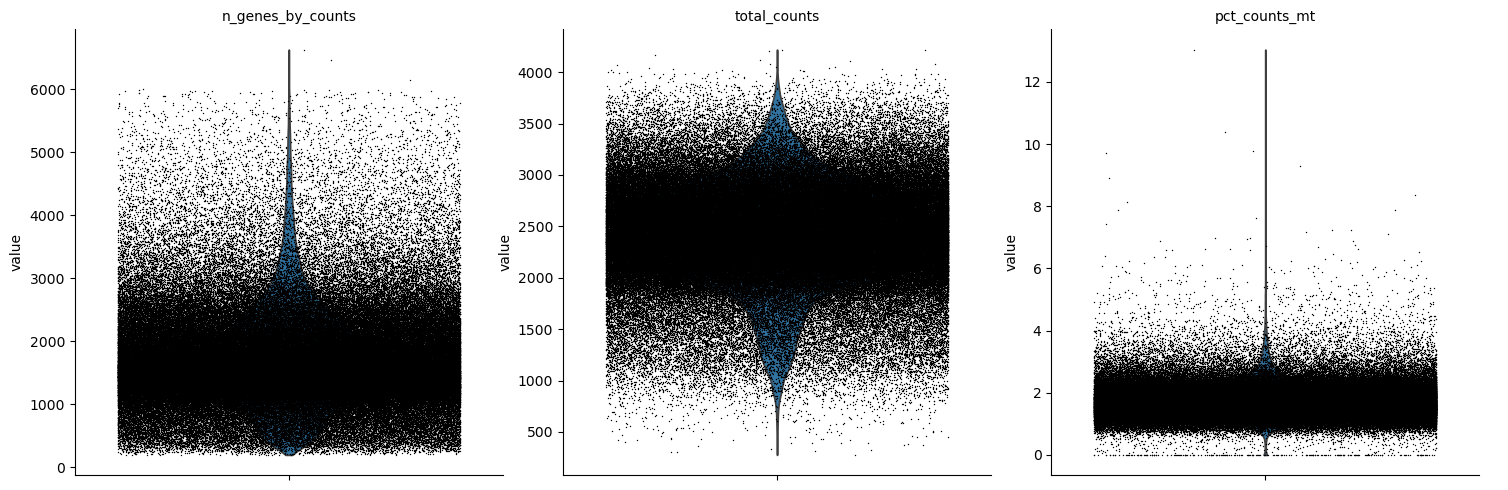

In [16]:
sc.pl.violin(
    luoma_et_al_all_normalized,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [17]:
sc.pp.filter_cells(luoma_et_al_all_normalized, min_genes=100)
sc.pp.filter_genes(luoma_et_al_all_normalized, min_cells=3)

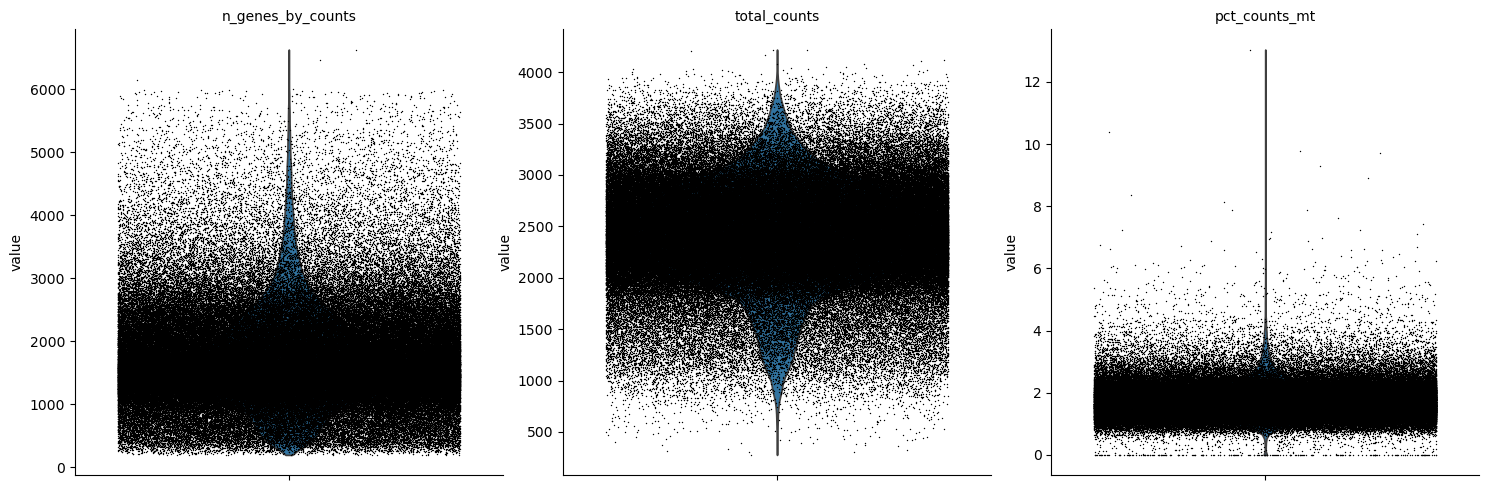

In [18]:
sc.pl.violin(
    luoma_et_al_all_normalized,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [19]:
import scanpy.external as scr
scr.pp.scrublet(luoma_et_al_all_normalized, batch_key="patient_id_pre_post_tissue")

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 61.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 32.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 57.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 65.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 58.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 67.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 55.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 57.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 68.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 68.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 60.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 63.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 64.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 64.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 62.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 63.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 66.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 67.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 64.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 63.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 62.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 59.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 57.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 66.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 10.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 62.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 68.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 68.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 42.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.22
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 69.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 66.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 62.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 25.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 64.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 57.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.5%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 35.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 60.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 62.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 68.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 65.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 30.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 64.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 46.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 62.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 62.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 31.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 66.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 58.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 56.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 31.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.23
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 70.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 59.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 55.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 64.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 68.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 62.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 38.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 65.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 63.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 65.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 46.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 54.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 19.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 1.1%
Estimated detectable doublet fraction = 65.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 46.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 67.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 46.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 62.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 48.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 64.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 68.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.9%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 36.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 64.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 32.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 21.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 66.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 36.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 70.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.33
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 55.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 41.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 49.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.8%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 34.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 68.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.44
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 22.6%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 59.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.7%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 65.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 41.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 67.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.6%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 70.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 32.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.4%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 42.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.2%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 69.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.1%


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:250: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.34
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 52.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%


In [20]:
luoma_et_al_all_normalized_qc = luoma_et_al_all_normalized[luoma_et_al_all_normalized.obs['predicted_doublet'] == False]
luoma_et_al_all_normalized_qc.shape
#luoma_et_al_all_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized_qc.h5ad")


(218857, 26696)

In [ ]:
# we may need to remove batch effect
sc.tl.pca(luoma_et_al_all_normalized_qc)




In [22]:
sc.pp.neighbors(luoma_et_al_all_normalized_qc)
sc.tl.umap(luoma_et_al_all_normalized_qc)

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


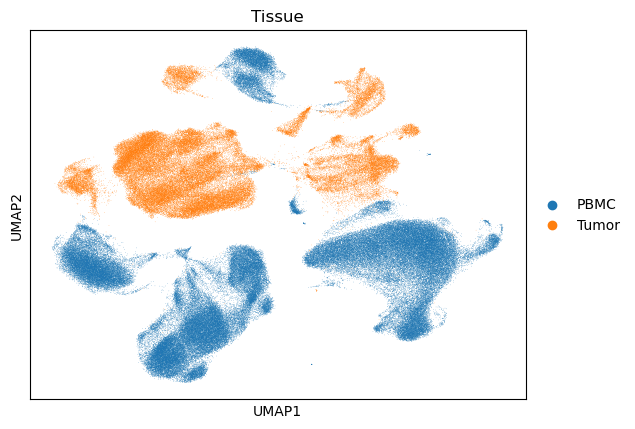

In [23]:
sc.pl.umap(luoma_et_al_all_normalized_qc, color="Tissue")


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


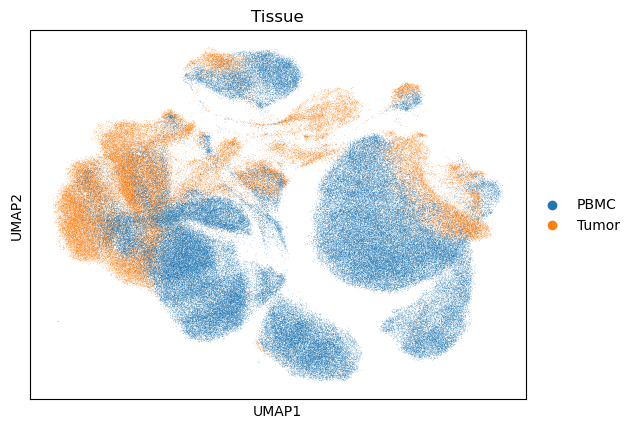

In [ ]:
import bbknn

# Use BBKNN to correct for batch effects of tissue
# This assumes PCA, neighbors have been run previously
# 'Tissue' should be a column in .obs with batch assignment (PBMC vs Tumor)
bbknn.bbknn(luoma_et_al_all_normalized_qc, batch_key='Tissue')

# Recompute UMAP embedding
sc.tl.umap(luoma_et_al_all_normalized_qc)

# Plot UMAP to visualize batch correction by tissue
sc.pl.umap(c, color="Tissue")


In [25]:
luoma_et_al_all_normalized_qc.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized_qc_batch_corrected.h5ad")

In [2]:
import anndata as ad
luoma_et_al_all_normalized_qc = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_normalized_qc_batch_corrected.h5ad")

In [3]:
luoma_et_al_all_normalized_qc.shape

(218857, 26696)

In [11]:
luoma_et_al_all_normalized_qc.obs.columns
luoma_et_al_all_normalized_qc.obs = pd.merge(luoma_et_al_all_normalized_qc.obs, luoma_metadata, left_on='Patient_ID', right_on='Pat. ID', how="left")


In [15]:
luoma_metadata

,Cohort,Cycles delivered,"Progression-free survival event (recurrence, death, new primary)",Alive and disease free at end of the follow up interval,Died,Clinical to pathologic downstaging,RECIST response excluding non measurable,Volumetric response,Viable Tumor % post,Pathological response %,Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High,Near complete/ complete response (<=10% viable tumor),Any response >=10% (90% or less viable tumor),Comment,response_binary,response_shorer
Pat. ID,,,,,,,,,,,,,,,,
P01,Mono,1,no,yes,no,NaN,stable/progress,yes,NaN,NaN,NaN,NaN,NaN,P01 did not have tumor resection following tre...,1,0
P02,Mono,2,NaN,NaN,NaN,no,stable/progress,no,90.0,10.0,Medium,no,yes,P02 was originally enrolled but later deemed t...,0,0
P04,Mono,2,no,yes,no,yes,not measurable,no,90.0,10.0,Medium,no,yes,P03 ID was skipped because consented patient w...,0,0
P05,Combo,2,no,yes,no,yes,not measurable,yes,5.0,95.0,High,yes,yes,NaN,1,1
P06,Combo,2,no,yes,no,yes,not measurable,no,70.0,30.0,Medium,no,yes,NaN,0,0
P07,Combo,2,no,yes,no,no,not measurable,no,90.0,10.0,Medium,no,yes,NaN,0,0
P08,Mono,2,no,yes,no,no,not measurable,no,95.0,5.0,Low,no,no,NaN,0,0
P09,Mono,2,no,yes,no,yes,not measurable,yes,20.0,80.0,High,no,yes,NaN,1,1
P10,Combo,2,yes,no,yes,no,stable/progress,no,85.0,15.0,Medium,no,yes,NaN,0,0


In [14]:
luoma_et_al_all_normalized_qc.obs['patient_id_pre_post_tissue'].unique()

['P32_Pre_Tumor', 'P31_Post_Tumor', 'P22_Post_Tumor', 'P25_Post_Tumor', 'P15_Post_Tumor', ..., 'P04_Pre_PBMC', 'P04_On_PBMC', 'P05_On_PBMC', 'P05_Pre_PBMC', 'P05_Post_PBMC']
Length: 94
Categories (94, object): ['P01_On_PBMC', 'P01_Post_PBMC', 'P01_Pre_PBMC', 'P02_On_PBMC', ..., 'P32_Post_PBMC', 'P32_Post_Tumor', 'P32_Pre_PBMC', 'P32_Pre_Tumor']

In [13]:
luoma_et_al_all_normalized_qc_cleaned = luoma_et_al_all_normalized_qc.copy()
luoma_et_al_all_normalized_qc_cleaned.obs.drop(columns=['Comment'], inplace=True)
luoma_et_al_all_normalized_qc_cleaned.obs.drop(columns=['Unnamed: 0'], inplace=True)
luoma_et_al_all_normalized_qc_cleaned = luoma_et_al_all_normalized_qc_cleaned[luoma_et_al_all_normalized_qc_cleaned.obs["RECIST response excluding non measurable"] != "not measurable"]
luoma_et_al_all_normalized_qc_cleaned.obs["patient_id_pre_post_tissue"].unique()


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


['P32_Pre_Tumor', 'P31_Post_Tumor', 'P25_Post_Tumor', 'P15_Post_Tumor', 'P24_Pre_Tumor', ..., 'P31_On_PBMC', 'P31_Pre_PBMC', 'P32_Pre_PBMC', 'P32_On_PBMC', 'P32_Post_PBMC']
Length: 59
Categories (59, object): ['P01_On_PBMC', 'P01_Post_PBMC', 'P01_Pre_PBMC', 'P02_On_PBMC', ..., 'P32_Post_PBMC', 'P32_Post_Tumor', 'P32_Pre_PBMC', 'P32_Pre_Tumor']

In [16]:
luoma_et_al_all_normalized_qc_cleaned_pre = luoma_et_al_all_normalized_qc_cleaned[luoma_et_al_all_normalized_qc_cleaned.obs["pre_post"] == "Pre"]
luoma_et_al_all_normalized_qc_cleaned_pre.obs["patient_id_pre_post_tissue"].unique()

['P32_Pre_Tumor', 'P24_Pre_Tumor', 'P29_Pre_Tumor', 'P23_Pre_Tumor', 'P27_Pre_Tumor', ..., 'P21_Pre_PBMC', 'P25_Pre_PBMC', 'P28_Pre_PBMC', 'P31_Pre_PBMC', 'P32_Pre_PBMC']
Length: 21
Categories (21, object): ['P01_Pre_PBMC', 'P02_Pre_PBMC', 'P10_Pre_PBMC', 'P13_Pre_PBMC', ..., 'P29_Pre_Tumor', 'P31_Pre_PBMC', 'P32_Pre_PBMC', 'P32_Pre_Tumor']

In [17]:
T_cells = ['T cell', 'CD4', 'CD8']
luoma_et_al_all_normalized_qc_cleaned_pre_pre_t_cells = luoma_et_al_all_normalized_qc_cleaned_pre[luoma_et_al_all_normalized_qc_cleaned_pre.obs["CellType_ID"].isin(T_cells)]
luoma_et_al_all_normalized_qc_cleaned_pre_pre_t_cells.obs['patient_id_pre_post_tissue'].unique()

['P32_Pre_Tumor', 'P24_Pre_Tumor', 'P29_Pre_Tumor', 'P23_Pre_Tumor', 'P27_Pre_Tumor', ..., 'P21_Pre_PBMC', 'P25_Pre_PBMC', 'P28_Pre_PBMC', 'P31_Pre_PBMC', 'P32_Pre_PBMC']
Length: 21
Categories (21, object): ['P01_Pre_PBMC', 'P02_Pre_PBMC', 'P10_Pre_PBMC', 'P13_Pre_PBMC', ..., 'P29_Pre_Tumor', 'P31_Pre_PBMC', 'P32_Pre_PBMC', 'P32_Pre_Tumor']

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initiali

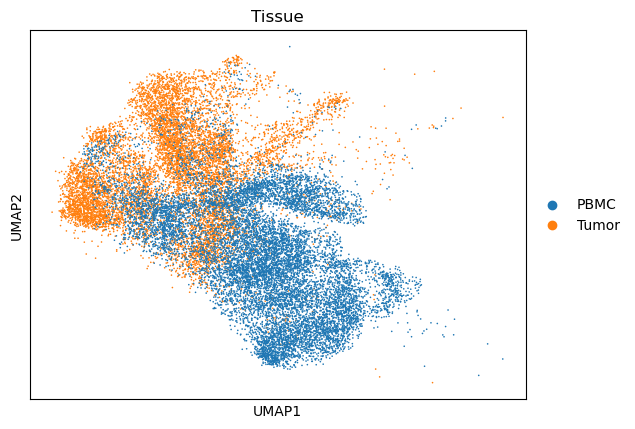

In [19]:
import scanpy as sc
sc.pl.umap(luoma_et_al_all_normalized_qc_cleaned_pre_pre_t_cells, color="Tissue")


In [20]:
luoma_et_al_all_normalized_qc_cleaned_pre_pre_t_cells.write_h5ad("luoma_et_al_all_normalized_qc_relabeled_pre_t_cells.h5ad")

In [16]:
luoma_et_al_all_normalized_pre_qc = luoma_et_al_all_normalized_qc[luoma_et_al_all_normalized_qc.obs["pre_post"] == "Pre"]

In [18]:
luoma_et_al_all_normalized_pre_qc

View of AnnData object with n_obs × n_vars = 75154 × 26696
    obs: 'Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'Tissue', 'response_binary', 'pre_post', 'patient_id_pre_post', 'patient_id_pre_post_tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'Tissue_colors', 'log1p', 'neighbors', 'pca', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'd

In [19]:
luoma_et_al_all_normalized_qc.obs["CellType_ID"].unique()
#luoma_et_al_all_pre_t_cells = luoma_et_al_all_pre[luoma_et_al_all_pre.obs["CellType_ID"] == "T"]

['Myeloid', 'B cell', 'T cell', 'CD4', 'CD8', 'NK cell', 'Mast', 'Cycling']
Categories (8, object): ['B cell', 'CD4', 'CD8', 'Cycling', 'Mast', 'Myeloid', 'NK cell', 'T cell']

In [20]:
T_cells = ['T cell', 'CD4', 'CD8']
luoma_et_al_all_normalized_pre_qc_t_cells = luoma_et_al_all_normalized_qc[luoma_et_al_all_normalized_qc.obs["CellType_ID"].isin(T_cells)]
luoma_et_al_all_normalized_pre_qc_t_cells.obs['patient_id_pre_post_tissue'].unique()

['P32_Pre_Tumor', 'P31_Post_Tumor', 'P22_Post_Tumor', 'P25_Post_Tumor', 'P15_Post_Tumor', ..., 'P04_On_PBMC', 'P04_Pre_PBMC', 'P05_Pre_PBMC', 'P05_On_PBMC', 'P05_Post_PBMC']
Length: 94
Categories (94, object): ['P01_On_PBMC', 'P01_Post_PBMC', 'P01_Pre_PBMC', 'P02_On_PBMC', ..., 'P32_Post_PBMC', 'P32_Post_Tumor', 'P32_Pre_PBMC', 'P32_Pre_Tumor']

/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


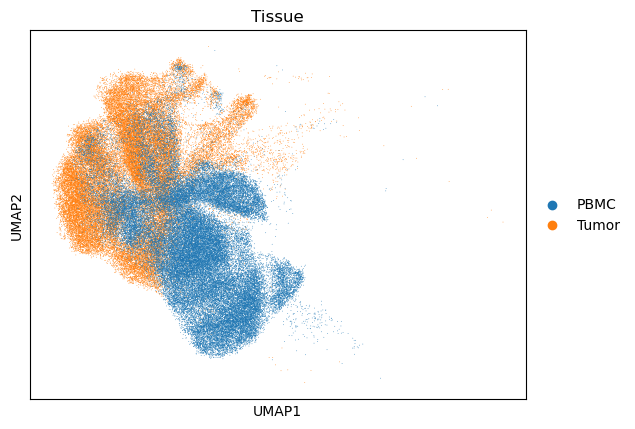

In [22]:

sc.pl.umap(luoma_et_al_all_normalized_pre_qc_t_cells, color="Tissue")


In [23]:
luoma_et_al_all_normalized_pre_qc_t_cells.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_pre_t_cells_batch_corrected.h5ad")

In [165]:


# Also, print totals:
print("Total response samples:", len(luoma_et_al_all_normalized_pre_t_cells.obs.loc[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 1, "patient_id_pre_post_tissue"].unique()))
print("Total non-response samples:", len(luoma_et_al_all_normalized_pre_t_cells.obs.loc[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 0, "patient_id_pre_post_tissue"].unique()))



Total response samples: 17
Total non-response samples: 16


In [166]:
luoma_et_al_all_normalized_pre_t_cells.shape

(34606, 36601)

In [125]:
luoma_et_al_PBMC.write_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_PBMC_cleaned_metadata.h5ad")

In [ ]:
# now we want to select 
luoma_et_al_tissue_columns = luoma_et_al_tissue.obs.columns.tolist()

luoma_et_al_PBMC_columns = luoma_et_al_PBMC.obs.columns.tolist()
luoma_et_al_tissue_columns


['source_file',
 'Barcode',
 'barcode_no_trailing1',
 'patient_id',
 'pre_post',
 'patient_id_pre_post',
 'barcode_patient_id_pre_post',
 'Unnamed: 0',
 'Patient_ID',
 'Stage',
 'Cohort_x',
 'Path_response',
 'CellType_ID',
 'UMAP_1',
 'UMAP_2',
 'Cohort_y',
 'Cycles delivered',
 'Progression-free survival event (recurrence, death, new primary)',
 'Alive and disease free at end of the follow up interval',
 'Died ',
 'Clinical to pathologic downstaging',
 'RECIST response excluding non measurable',
 'Volumetric response',
 'Viable Tumor % post',
 'Pathological response %',
 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High',
 'Near complete/ complete response (<=10% viable tumor) ',
 'Any response >=10% (90% or less viable tumor)  ',
 'response_binary',
 'Tissue']

In [102]:
luoma_et_al_PBMC_columns

['source_file',
 'Barcode',
 'barcode_no_trailing1',
 'patient_id',
 'stage',
 'pre_post',
 'Unnamed: 0',
 'Patient_ID',
 'Stage',
 'Cohort_x',
 'Path_response',
 'CellType_ID',
 'UMAP_1',
 'UMAP_2',
 'Barcode_meta',
 'pre_post_meta',
 'patient_id_pre_post',
 'Tissue',
 'Cohort_y',
 'Cycles delivered',
 'Progression-free survival event (recurrence, death, new primary)',
 'Alive and disease free at end of the follow up interval',
 'Died ',
 'Clinical to pathologic downstaging',
 'RECIST response excluding non measurable',
 'Volumetric response',
 'Viable Tumor % post',
 'Pathological response %',
 'Pathological Response Bins: 0-9% response = Low; 10-49% response = Medium; 50-100% rseponse = High',
 'Near complete/ complete response (<=10% viable tumor) ',
 'Any response >=10% (90% or less viable tumor)  ',
 'response_binary']

In [22]:
import scanpy as sc
import anndata as ad
import pandas as pd
luoma_et_al_all_normalized_pre_t_cells = ad.read_h5ad("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/luoma_et_al_all_pre_t_cells.h5ad")
luoma_et_al_all_normalized_pre_t_cells.shape

(34606, 36601)

In [24]:
luoma_et_al_all_normalized_pre_t_cells

AnnData object with n_obs × n_vars = 34606 × 36601
    obs: 'Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'Tissue', 'response_binary', 'pre_post', 'patient_id_pre_post', 'patient_id_pre_post_tissue'
    uns: 'log1p'
    layers: 'counts'

In [29]:
print("response samples number: ", len(luoma_et_al_all_normalized_pre_t_cells.obs.loc[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 1, "patient_id_pre_post_tissue"].unique()))
print("non-response samples number: ", len(luoma_et_al_all_normalized_pre_t_cells.obs.loc[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 0, "patient_id_pre_post_tissue"].unique()))
print("response T-cells number: ", len(luoma_et_al_all_normalized_pre_t_cells.obs[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 1]))
print("non-response T-cells number: ", len(luoma_et_al_all_normalized_pre_t_cells.obs[luoma_et_al_all_normalized_pre_t_cells.obs["response_binary"] == 0]))
#luoma_et_al_all_normalized_pre_t_cells.obs['patient_id_pre_post_tissue'].unique()

response samples number:  17
non-response samples number:  16
response T-cells number:  14726
non-response T-cells number:  19880


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


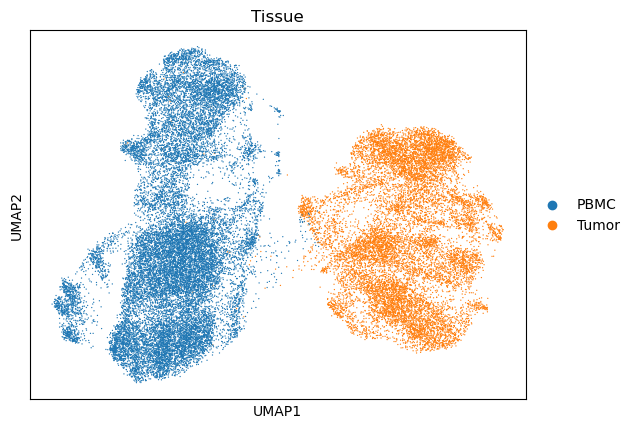

In [4]:
sc.tl.pca(luoma_et_al_all_normalized_pre_t_cells)

sc.pp.neighbors(luoma_et_al_all_normalized_pre_t_cells)

sc.tl.umap(luoma_et_al_all_normalized_pre_t_cells)
sc.pl.umap(luoma_et_al_all_normalized_pre_t_cells, color="Tissue")


/opt/miniconda3/envs/precise_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


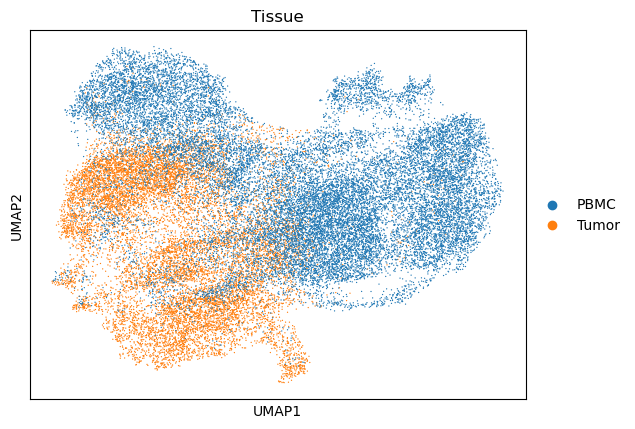

In [5]:
import bbknn

# Use BBKNN to correct for batch effects of tissue
# This assumes PCA, neighbors have been run previously
# 'Tissue' should be a column in .obs with batch assignment (PBMC vs Tumor)
bbknn.bbknn(luoma_et_al_all_normalized_pre_t_cells, batch_key='Tissue')

# Recompute UMAP embedding
sc.tl.umap(luoma_et_al_all_normalized_pre_t_cells)

# Plot UMAP to visualize batch correction by tissue
sc.pl.umap(luoma_et_al_all_normalized_pre_t_cells, color="Tissue")


In [6]:
luoma_et_al_all_normalized_pre_t_cells

AnnData object with n_obs × n_vars = 34606 × 36601
    obs: 'Unnamed: 0', 'Patient_ID', 'Stage', 'CellType_ID', 'Cohort_x', 'Tissue', 'response_binary', 'pre_post', 'patient_id_pre_post', 'patient_id_pre_post_tissue'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'Tissue_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [7]:

import pandas as pd

# Calculate mean value for each gene across all cells
# Calculate mean value for each gene grouped by 'Sample'
import numpy as np
import pandas as pd

sample_means = []
sample_names = []

for sample in luoma_et_al_all_normalized_pre_t_cells.obs['patient_id_pre_post_tissue'].unique():
    idx = luoma_et_al_all_normalized_pre_t_cells.obs['patient_id_pre_post_tissue'] == sample
    sub = luoma_et_al_all_normalized_pre_t_cells[idx]
    # handle sparse matrices if necessary
    X = sub.X
    mean = np.asarray(X.mean(axis=0)).ravel()
    sample_means.append(mean)
    sample_names.append(sample)

gene_means_by_sample = pd.DataFrame(
    sample_means,
    columns=luoma_et_al_all_normalized_pre_t_cells.var_names,
    index=sample_names
)

gene_means_by_sample




,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
P32_Pre_Tumor,0.0,0.0,0.0,0.000829,0.000000,0.0,0.002876,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000928,0.000000
P24_Pre_Tumor,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000436,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000564,0.000000
P29_Pre_Tumor,0.0,0.0,0.0,0.001060,0.000000,0.0,0.001848,0.0,0.000683,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
P18_Pre_Tumor,0.0,0.0,0.0,0.001096,0.000000,0.0,0.000493,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000684,0.000000
P23_Pre_Tumor,0.0,0.0,0.0,0.000334,0.000373,0.0,0.001346,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001060,0.000000
P27_Pre_Tumor,0.0,0.0,0.0,0.002537,0.000000,0.0,0.000676,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
P01_Pre_PBMC,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003298,0.000000
P02_Pre_PBMC,0.0,0.0,0.0,0.000000,0.000000,0.0,0.005379,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
P22_Pre_PBMC,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003668,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001554,0.000000
P23_Pre_PBMC,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003673,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001297,0.000000


In [8]:
gene_means_by_sample = gene_means_by_sample.T
gene_means_by_sample['Gene'] = gene_means_by_sample.index
gene_means_by_sample.index = gene_means_by_sample['Gene']

In [9]:
# add response information 
luoma_et_al_all_normalized_pre_t_cells_sample_response = luoma_et_al_all_normalized_pre_t_cells.obs[['patient_id_pre_post_tissue', 'response_binary']]

# Add luoma_et_al_all_normalized_pre_t_cells_sample_response as the last row of gene_means_by_sample
# (Each column except 'Gene' is a sample. For each, fill value from response_binary, else None. 'Gene' column gets string 'Responder')
sample_columns = [col for col in gene_means_by_sample.columns if col != 'Gene']
response_values = luoma_et_al_all_normalized_pre_t_cells_sample_response.drop_duplicates().set_index('patient_id_pre_post_tissue').to_dict()['response_binary']
new_last_row = {col: response_values.get(col, None) for col in sample_columns}
new_last_row['Gene'] = 'Responder'
gene_means_by_sample.loc['Responder'] = new_last_row


In [10]:
gene_means_by_sample

,P32_Pre_Tumor,P24_Pre_Tumor,P29_Pre_Tumor,P18_Pre_Tumor,P23_Pre_Tumor,P27_Pre_Tumor,P01_Pre_PBMC,P02_Pre_PBMC,P22_Pre_PBMC,P23_Pre_PBMC,...,P21_Pre_PBMC,P25_Pre_PBMC,P28_Pre_PBMC,P19_Pre_PBMC,P20_Pre_PBMC,P31_Pre_PBMC,P32_Pre_PBMC,P04_Pre_PBMC,P05_Pre_PBMC,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MIR1302-2HG
FAM138A,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FAM138A
OR4F5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F5
AL627309.1,0.000829,0.000000,0.00106,0.001096,0.000334,0.002537,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.003838,0.000000,0.003162,0.003205,0.000000,0.002666,AL627309.1
AL627309.3,0.000000,0.000000,0.00000,0.000000,0.000373,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL627309.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC023491.2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC023491.2
AC007325.1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC007325.1
AC007325.4,0.000928,0.000564,0.00000,0.000684,0.001060,0.000000,0.003298,0.0,0.001554,0.001297,...,0.0,0.003827,0.001736,0.000000,0.003487,0.001446,0.004137,0.000959,0.002909,AC007325.4


In [58]:
len(set(sample_columns).intersection(set(response_series.index)))

33

In [11]:
protein_coding_genes = pd.read_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/protein_coding_reference.csv")
# Filter gene_means_by_sample to include only protein-coding genes
protein_coding_gene_set = set(protein_coding_genes['x'])
gene_means_by_sample_pc = gene_means_by_sample[gene_means_by_sample.index.isin(protein_coding_gene_set)]
gene_means_by_sample_pc

,P32_Pre_Tumor,P24_Pre_Tumor,P29_Pre_Tumor,P18_Pre_Tumor,P23_Pre_Tumor,P27_Pre_Tumor,P01_Pre_PBMC,P02_Pre_PBMC,P22_Pre_PBMC,P23_Pre_PBMC,...,P21_Pre_PBMC,P25_Pre_PBMC,P28_Pre_PBMC,P19_Pre_PBMC,P20_Pre_PBMC,P31_Pre_PBMC,P32_Pre_PBMC,P04_Pre_PBMC,P05_Pre_PBMC,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F5
OR4F29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F29
OR4F16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F16
SAMD11,0.000683,0.000000,0.000000,0.000330,0.001428,0.000396,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SAMD11
NOC2L,0.199969,0.222523,0.185712,0.218296,0.216338,0.230071,0.19231,0.184084,0.146203,0.142331,...,0.160679,0.18789,0.183466,0.156424,0.158619,0.156941,0.188347,0.199176,0.187102,NOC2L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPY2B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BPY2B
DAZ3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DAZ3
DAZ4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,DAZ4


In [13]:
gene_means_by_sample

,P32_Pre_Tumor,P24_Pre_Tumor,P29_Pre_Tumor,P18_Pre_Tumor,P23_Pre_Tumor,P27_Pre_Tumor,P01_Pre_PBMC,P02_Pre_PBMC,P22_Pre_PBMC,P23_Pre_PBMC,...,P21_Pre_PBMC,P25_Pre_PBMC,P28_Pre_PBMC,P19_Pre_PBMC,P20_Pre_PBMC,P31_Pre_PBMC,P32_Pre_PBMC,P04_Pre_PBMC,P05_Pre_PBMC,Gene
Gene,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MIR1302-2HG
FAM138A,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,FAM138A
OR4F5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OR4F5
AL627309.1,0.000829,0.000000,0.00106,0.001096,0.000334,0.002537,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.003838,0.000000,0.003162,0.003205,0.000000,0.002666,AL627309.1
AL627309.3,0.000000,0.000000,0.00000,0.000000,0.000373,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL627309.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC023491.2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC023491.2
AC007325.1,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC007325.1
AC007325.4,0.000928,0.000564,0.00000,0.000684,0.001060,0.000000,0.003298,0.0,0.001554,0.001297,...,0.0,0.003827,0.001736,0.000000,0.003487,0.001446,0.004137,0.000959,0.002909,AC007325.4


In [12]:
gene_means_by_sample_pc = pd.concat([gene_means_by_sample_pc,gene_means_by_sample[gene_means_by_sample.index == 'Responder']])
gene_means_by_sample_pc.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_means_by_sample_luoma_et_al_pc_batch_corrected.csv")

In [14]:
gene_means_by_sample.to_csv("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/gene_means_by_sample_luoma_et_al_batch_corrected.csv")

In [68]:
gene_means_by_sample_pc

,P32_Pre_Tumor,P24_Pre_Tumor,P29_Pre_Tumor,P18_Pre_Tumor,P23_Pre_Tumor,P27_Pre_Tumor,P01_Pre_PBMC,P02_Pre_PBMC,P22_Pre_PBMC,P23_Pre_PBMC,...,P09_Pre_PBMC,P21_Pre_PBMC,P25_Pre_PBMC,P28_Pre_PBMC,P19_Pre_PBMC,P20_Pre_PBMC,P31_Pre_PBMC,P32_Pre_PBMC,P04_Pre_PBMC,P05_Pre_PBMC
Gene,,,,,,,,,,,,,,,,,,,,,
SAMD11,0.000683,0.000000,0.000000,0.000330,0.001428,0.000396,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOC2L,0.199969,0.222523,0.185712,0.218296,0.216338,0.230071,0.192310,0.184084,0.146203,0.142331,...,0.164525,0.160679,0.187890,0.183466,0.156424,0.158619,0.156941,0.188347,0.199176,0.187102
KLHL17,0.011210,0.018450,0.019232,0.015246,0.014715,0.021215,0.003639,0.005702,0.001417,0.007585,...,0.002349,0.002764,0.007000,0.007748,0.011522,0.004966,0.008630,0.003799,0.009282,0.012075
PLEKHN1,0.014611,0.025869,0.018591,0.023524,0.034567,0.040934,0.003063,0.003015,0.002025,0.010094,...,0.005628,0.008751,0.005385,0.000652,0.008115,0.001432,0.011629,0.005163,0.004226,0.000975
PERM1,0.000000,0.000000,0.000000,0.000000,0.000957,0.000557,0.000000,0.000000,0.000000,0.000000,...,0.001184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDM5D,0.000000,0.160634,0.228296,0.144959,0.158050,0.158252,0.130668,0.000000,0.000000,0.079559,...,0.138720,0.104096,0.115699,0.000000,0.109998,0.111485,0.138776,0.000000,0.001059,0.104317
EIF1AY,0.000000,0.267350,0.232207,0.294397,0.234849,0.268255,0.215232,0.005123,0.000000,0.183684,...,0.234374,0.164726,0.288901,0.000906,0.259364,0.208308,0.240117,0.000000,0.001312,0.256450
RPS4Y2,0.000000,0.002886,0.000770,0.001716,0.000000,0.002079,0.000000,0.000000,0.000000,0.000000,...,0.001259,0.000000,0.000667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000573


In [17]:
import pandas as pd
metrics_bulk_rna = pd.read_excel("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/bulk_rna_model_metrics.xlsx", sheet_name="Sheet1")
metrics_bulk_rna

,Dataset,Model,Condition,Accuracy,F1 (Macro),AUC,Imbalance Ratio,Runtime (s)
0,Cho et al.,COMPASS (LFT),NaN,0.44,0.31,0.55,0.45,24.60
1,NaN,COMPASS (PFT),NaN,0.50,0.43,0.55,0.45,21.43
2,NaN,IRnet,NaN,0.69,0.54,0.69,0.45,6.95
3,NaN,NetBio,NaN,0.75,0.75,0.75,0.45,17.00
4,Ribas et al.,COMPASS (LFT),NaN,0.42,0.13,0.36,0.85,25.44
5,NaN,COMPASS (PFT),NaN,0.50,0.08,0.48,0.85,23.70
6,NaN,IRnet,NaN,0.58,0.44,0.61,0.85,12.04
7,NaN,NetBio,NaN,1.00,1.00,1.00,0.85,64.00
8,Poddubskaya et al.,COMPASS (LFT),NaN,0.28,0.24,0.31,0.49,26.74
9,NaN,COMPASS (PFT),NaN,0.48,0.52,0.45,0.49,24.63


In [18]:
metrics_sc_rna = pd.read_excel("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/bulk_rna_model_metrics.xlsx",sheet_name="Sheet2")
metrics_sc_rna

,Dataset,Model,Accuracy,F1 (Macro),AUC,Imbalance Ratio,Runtime (s)
0,Gondal et al.,PRECISE,0.590000,0.380000,0.450000,0.54,595.020000
1,NaN,PRECISE-refined features,0.610000,0.390000,0.600000,0.54,2905.850000
2,NaN,DeepGeneX,0.719298,0.529412,0.805405,0.54,374.656095
3,NaN,Tres,0.390000,0.380000,0.340000,0.54,0.890000
4,Franken et al.,PRECISE,0.500000,0.670000,0.440000,0.67,147.460000
5,NaN,PRECISE-refined features,0.550000,0.709677,0.520833,0.67,811.200000
6,NaN,DeepGeneX,1.000000,0.000000,0.000000,0.67,128.850000
7,NaN,Tres,0.450000,0.450000,0.530000,0.67,0.510000
8,Luoma et al.,PRECISE,0.776596,0.807339,0.837500,0.94,1238.370000
9,NaN,PRECISE-refined features,0.585106,0.682927,0.722527,0.94,5297.960000


In [19]:
metrics_bulk_rna_process = metrics_bulk_rna.ffill()

In [20]:
metrics_bulk_rna_process.rename(columns={'Dataset ':'Dataset'}, inplace=True)


In [21]:
metrics_bulk_rna_process

,Dataset,Model,Condition,Accuracy,F1 (Macro),AUC,Imbalance Ratio,Runtime (s)
0,Cho et al.,COMPASS (LFT),NaN,0.44,0.31,0.55,0.45,24.60
1,Cho et al.,COMPASS (PFT),NaN,0.50,0.43,0.55,0.45,21.43
2,Cho et al.,IRnet,NaN,0.69,0.54,0.69,0.45,6.95
3,Cho et al.,NetBio,NaN,0.75,0.75,0.75,0.45,17.00
4,Ribas et al.,COMPASS (LFT),NaN,0.42,0.13,0.36,0.85,25.44
5,Ribas et al.,COMPASS (PFT),NaN,0.50,0.08,0.48,0.85,23.70
6,Ribas et al.,IRnet,NaN,0.58,0.44,0.61,0.85,12.04
7,Ribas et al.,NetBio,NaN,1.00,1.00,1.00,0.85,64.00
8,Poddubskaya et al.,COMPASS (LFT),NaN,0.28,0.24,0.31,0.49,26.74
9,Poddubskaya et al.,COMPASS (PFT),NaN,0.48,0.52,0.45,0.49,24.63


In [22]:
metrics_sc_rna_process = metrics_sc_rna.ffill()

In [23]:
metrics_sc_rna_process.rename(columns={'Dataset ':'Dataset'}, inplace=True)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_model_points(
    df: pd.DataFrame,
    model_col="Model",
    metric_cols=None,
    order=None,
    hue_col=None,              # e.g. "Dataset" or "Drug"
    jitter=0.08,
    seed=7,
    figsize=(10, 9),
    runtime_log=True,
):
    if metric_cols is None:
        metric_cols = {
            "AUC": "AUC",
            "F1 (Macro)": "F1 (Macro)",
            "Accuracy": "Accuracy",
            "Runtime (s)": "Runtime (s)",
        }

    rng = np.random.default_rng(seed)

    models = order if order is not None else list(df[model_col].unique())
    x_pos = {m: i for i, m in enumerate(models)}

    # color handling
    if hue_col is not None:
        hues = df[hue_col].unique()
        cmap = plt.get_cmap("tab10")
        color_map = {h: cmap(i % 10) for i, h in enumerate(hues)}
    else:
        color_map = None

    fig, axes = plt.subplots(len(metric_cols), 1, figsize=figsize, constrained_layout=True)
    if len(metric_cols) == 1:
        axes = [axes]

    for ax, (label, col) in zip(axes, metric_cols.items()):
        for m in models:
            sub = df[df[model_col] == m]
            if sub.empty:
                continue

            y = sub[col].astype(float).to_numpy()
            x = x_pos[m] + rng.normal(0, jitter, size=len(y))

            if hue_col is None:
                ax.scatter(x, y, s=55, alpha=0.85)
            else:
                for xi, yi, h in zip(x, y, sub[hue_col]):
                    ax.scatter(xi, yi, s=55, alpha=0.85, color=color_map[h])

        ax.set_title(label, fontsize=12)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=25, ha="right")
        ax.grid(True, axis="y", alpha=0.25)

        if "runtime" in label.lower():
            if runtime_log:
                ax.set_yscale("log")
                ax.set_ylabel("seconds (log)")
            else:
                ax.set_ylabel("seconds")
        else:
            ax.set_ylim(0, 1.02)
            ax.set_ylabel(label)

    axes[-1].set_xlabel("Model")

    # legend (only once)
    if hue_col is not None:
        handles = [
            plt.Line2D([0], [0], marker='o', linestyle='', color=c, label=h)
            for h, c in color_map.items()
        ]
        axes[0].legend(
            handles=handles,
            title=hue_col,
            bbox_to_anchor=(1.02, 1),
            loc="upper left",
            frameon=False,
        )

    return fig


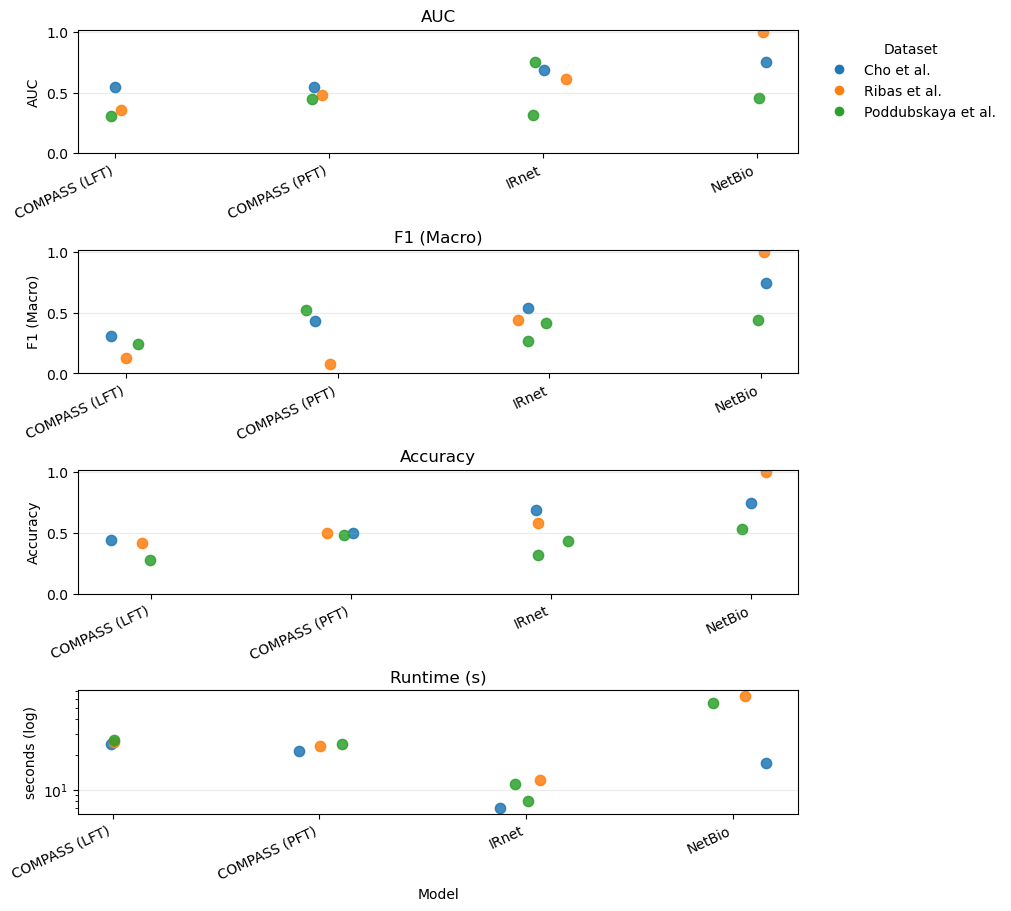

In [38]:
fig = plot_model_points(metrics_bulk_rna_process, hue_col="Dataset")
plt.show()


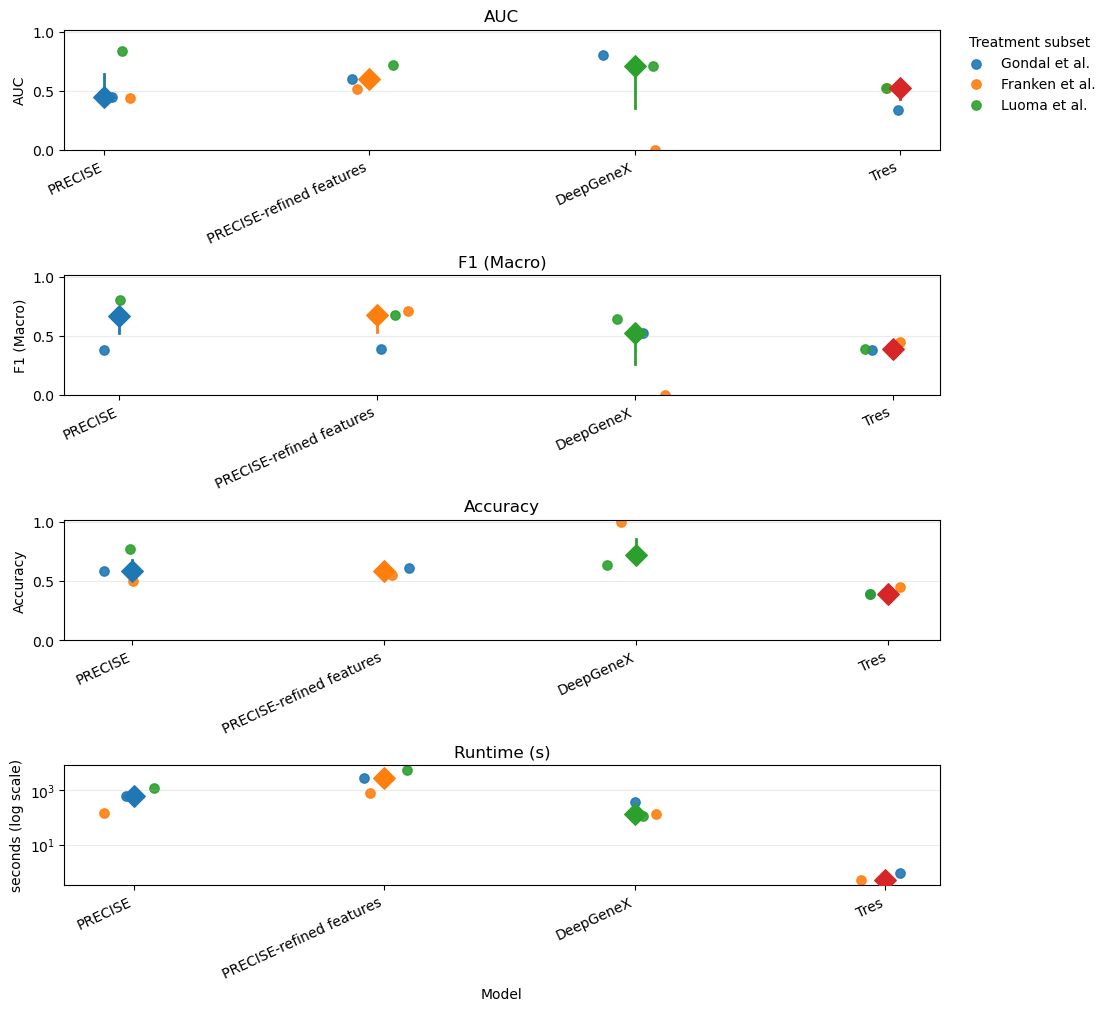

In [ ]:
fig = plot_model_points(metrics_sc_rna_process, hue_col="Dataset")
plt.show()

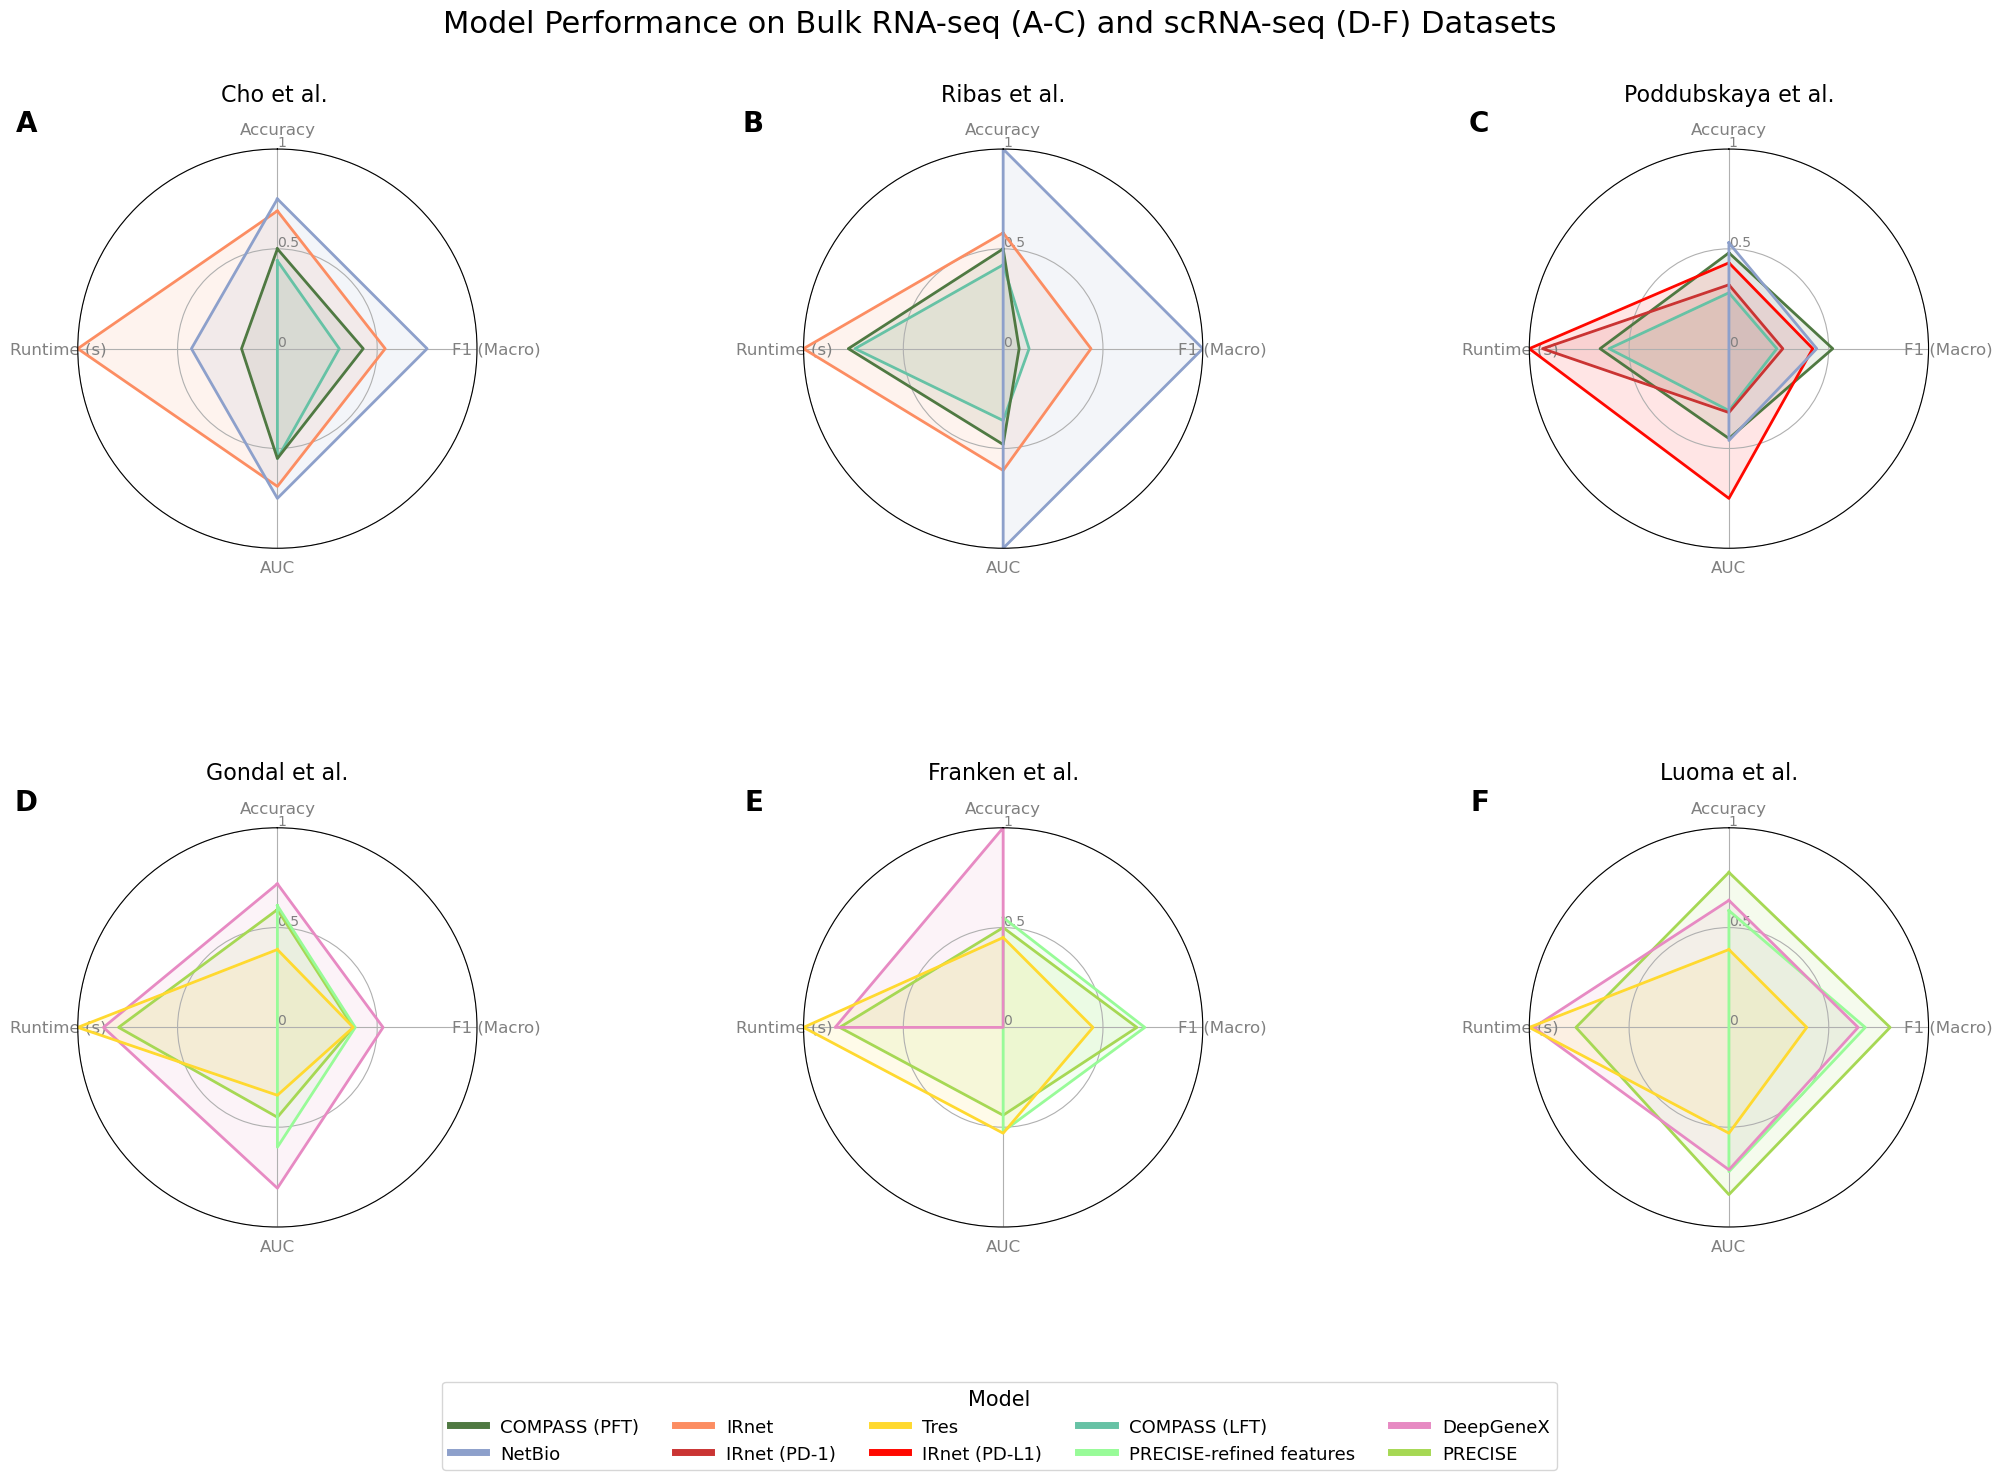

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define color scheme mapping for models using hex codes provided
model_color_dict = {
    "DeepGeneX": "#E78AC3",
    "PRECISE": "#A6D854",
    "PRECISE-refined features": "#98FB98", 
    "TRES": "#FFD92F",
    "COMPASS (LFT)": "#66C2A5",
    "COMPASS (PFT)": "#4F7942",
    "IRnet": "#FC8D62",
    "IRnet (PD-1)": "#CA3433",
    "IRnet (PD-L1)": "#FF0800",
    "NetBio": "#8DA0CB"
    # add more mappings if needed, will fallback to default for others
}

def get_model_color(model_name):
    # tries exact match, otherwise tries a prefix match (for COMPASS variants, etc)
    for key in model_color_dict:
        if model_name.strip().lower() == key.lower():
            return model_color_dict[key]
    return "#666666"  # fallback grey

# Function to build a model-color legend based on models actually present in these datasets
def get_model_legend_handles(models):
    # models: list/set of model names that appear in the plots
    # Make sure to use consistent color dict mapping
    seen = set()
    handles = []
    for m in models:
        if m not in seen:
            color = get_model_color(m)
            handles.append(Line2D([0], [0], color=color, linewidth=5, marker='', label=m))
            seen.add(m)
    return handles

metrics_to_plot = ["Accuracy", "F1 (Macro)", "AUC", "Runtime (s)"]

# Arrange spider plots for bulk RNA-seq and scRNA-seq datasets in a 2x3 grid (A-C, D-F panels)
bulk_datasets = list(metrics_bulk_rna_process['Dataset'].dropna().unique())
sc_datasets = list(metrics_sc_rna_process['Dataset'].dropna().unique())
all_datasets = bulk_datasets + sc_datasets

fig, axes = plt.subplots(2, 3, figsize=(21, 14), subplot_kw=dict(polar=True))
axes = axes.flatten()
metrics_to_plot = ["Accuracy", "F1 (Macro)", "AUC", "Runtime (s)"]

def plot_radar_on_ax(df, dataset, metrics, ax, label_column="Model"):
    labels = metrics
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='grey', size=12)

    def normalize(x, metric):
        if metric.lower() == "runtime (s)":
            mx = df[metric].max()
            mn = df[metric].min()
            return 1 - ((x - mn) / (mx - mn) if mx != mn else 0)
        else:
            return x  # assume 0-1

    for _, row in df.iterrows():
        values = [normalize(row[metric], metric) for metric in labels]
        values += values[:1]
        model_label = row[label_column]
        color = get_model_color(str(model_label))
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_label, color=color)
        ax.fill(angles, values, alpha=0.1, color=color)

    ax.set_rlabel_position(0)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(["0", "0.5", "1"], color="grey", size=10)
    ax.set_ylim(0, 1)
    ax.set_title(dataset, size=16, y=1.10)

# Get set of all unique model names actually present in the plots (across all panels)
unique_models = set()
for idx, dataset in enumerate(all_datasets):
    if idx < len(bulk_datasets):
        df = metrics_bulk_rna_process[metrics_bulk_rna_process['Dataset'] == dataset]
    else:
        df = metrics_sc_rna_process[metrics_sc_rna_process['Dataset'] == dataset]
    unique_models.update(df["Model"].dropna().astype(str).unique())

model_legend_handles = get_model_legend_handles(unique_models)

# Plot all six datasets
for idx, (dataset, ax) in enumerate(zip(all_datasets, axes)):
    if idx < len(bulk_datasets):
        df = metrics_bulk_rna_process[metrics_bulk_rna_process['Dataset'] == dataset]
    else:
        df = metrics_sc_rna_process[metrics_sc_rna_process['Dataset'] == dataset]
    df_plot = df[["Model"] + metrics_to_plot].dropna()
    plot_radar_on_ax(df_plot, dataset, metrics_to_plot, ax, label_column="Model")
    # Don't draw per-axes legends

# Set subplot labels (A-F)
panel_labels = ['A', 'B', 'C', 'D', 'E', 'F']
for ax, label in zip(axes, panel_labels):
    ax.text(-0.1, 1.1, label, transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')

# Put _single_ legend for all model colors as a separate artist
fig.legend(
    handles=model_legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.03),
    ncol=5, fontsize=13, title="Model", title_fontsize=15
)

plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.subplots_adjust(wspace=0.5, hspace=0.7, top=0.92, bottom=0.15)
plt.suptitle('Model Performance on Bulk RNA-seq (A-C) and scRNA-seq (D-F) Datasets', fontsize=22, y=1.02)
plt.savefig("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/model_spiderplot_6panel_bulk_sc.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll assume metrics_bulk_rna_process has the columns as shown previously
# Columns: 'Dataset', 'Model', 'Accuracy', 'F1 (Macro)', 'AUC'

metrics_to_plot = ['Accuracy', 'F1 (Macro)', 'AUC']
datasets = metrics_bulk_rna_process['Dataset'].dropna().unique()

for dataset in datasets:
    df = metrics_bulk_rna_process[metrics_bulk_rna_process['Dataset'] == dataset]
    df_plot = df.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Score')
    # Set figure size
    plt.figure(figsize=(7, 5))
    # Barplot with grouping by Metric
    sns.barplot(data=df_plot, x="Model", y="Score", hue="Metric", palette="Set2", edgecolor='k')
    plt.title(f"Model performance on {dataset} (Bulk RNA)")
    plt.ylim(0, 1.1)
    plt.ylabel('Value')
    plt.xlabel('Model')
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.savefig(f"/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/bulk_rna_model_performance_{dataset}.png")
    plt.close()


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# We'll assume metrics_bulk_rna_process has the columns as shown previously
# Columns: 'Dataset', 'Model', 'Accuracy', 'F1 (Macro)', 'AUC'

metrics_to_plot = ['Accuracy', 'F1 (Macro)', 'AUC']
datasets = metrics_sc_rna_process['Dataset'].dropna().unique()

for dataset in datasets:
    df = metrics_sc_rna_process[metrics_sc_rna_process['Dataset'] == dataset]
    df_plot = df.melt(id_vars='Model', value_vars=metrics_to_plot, var_name='Metric', value_name='Score')
    # Set figure size
    plt.figure(figsize=(7, 5))
    # Barplot with grouping by Metric
    sns.barplot(data=df_plot, x="Model", y="Score", hue="Metric", palette="Set2", edgecolor='k')
    plt.title(f"Model performance on {dataset} (scRNA)")
    plt.ylim(0, 1.1)
    plt.ylabel('Value')
    plt.xlabel('Model')
    plt.legend(title="Metric")
    plt.tight_layout()
    plt.savefig(f"/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/sc_rna_model_performance_{dataset}.png")
    plt.close()


In [70]:
# Plot mean Runtime (s) for each model in bulk RNA tables
bulk_datasets = metrics_bulk_rna_process['Dataset'].dropna().unique()
for dataset in bulk_datasets:
    df = metrics_bulk_rna_process[metrics_bulk_rna_process['Dataset'] == dataset]
    # Group by Model and compute mean Runtime (s)
    mean_runtime = df.groupby('Model')['Runtime (s)'].mean().reset_index()
    plt.figure(figsize=(7, 4))
    sns.barplot(data=mean_runtime, x="Model", y="Runtime (s)", palette="Blues", edgecolor='k')
    plt.title(f"Mean Runtime (s) by Model on {dataset} (Bulk RNA)")
    plt.ylabel('Mean Runtime (s)')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.savefig(f"/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/bulk_rna_mean_runtime_{dataset}.png")
    plt.close()

# Plot mean Runtime (s) for each model in scRNA tables
sc_datasets = metrics_sc_rna_process['Dataset'].dropna().unique()
for dataset in sc_datasets:
    df = metrics_sc_rna_process[metrics_sc_rna_process['Dataset'] == dataset]
    # Group by Model and compute mean Runtime (s)
    mean_runtime = df.groupby('Model')['Runtime (s)'].mean().reset_index()
    plt.figure(figsize=(7, 4))
    sns.barplot(data=mean_runtime, x="Model", y="Runtime (s)", palette="Greens", edgecolor='k')
    plt.title(f"Mean Runtime (s) by Model on {dataset} (scRNA)")
    plt.ylabel('Mean Runtime (s)')
    plt.xlabel('Model')
    plt.tight_layout()
    plt.savefig(f"/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/sc_rna_mean_runtime_{dataset}.png")
    plt.close()


/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_2221/3245161696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_runtime, x="Model", y="Runtime (s)", palette="Blues", edgecolor='k')
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_2221/3245161696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_runtime, x="Model", y="Runtime (s)", palette="Blues", edgecolor='k')
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_2221/3245161696.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mea

In [73]:
import numpy as np

# Plot overall mean Runtime (s) for each model across ALL bulk RNA datasets
mean_runtime_bulk_all = metrics_bulk_rna_process.groupby('Model')['Runtime (s)'].mean().reset_index()
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=mean_runtime_bulk_all, x="Model", y="Runtime (s)", palette="Blues", edgecolor='k')
plt.yscale('log')
plt.title("Mean Runtime (s) by Model across all Bulk RNA datasets (log scale)")

# Add seconds as labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}s", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, rotation=0, xytext=(0, 3), textcoords='offset points')

plt.ylabel('Mean Runtime (s, log scale)')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/bulk_rna_mean_runtime_ALL.png")
plt.close()

# Plot overall mean Runtime (s) for each model across ALL scRNA datasets
mean_runtime_sc_all = metrics_sc_rna_process.groupby('Model')['Runtime (s)'].mean().reset_index()
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=mean_runtime_sc_all, x="Model", y="Runtime (s)", palette="Greens", edgecolor='k')
plt.yscale('log')
plt.title("Mean Runtime (s) by Model across all scRNA datasets (log scale)")

# Add seconds as labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}s", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, rotation=0, xytext=(0, 3), textcoords='offset points')

plt.ylabel('Mean Runtime (s, log scale)')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig("/Users/z5155527/Desktop/Benchmark-2025-Sep/external_validation_datasets/code/sc_rna_mean_runtime_ALL.png")
plt.close()


/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_2221/2420624348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_runtime_bulk_all, x="Model", y="Runtime (s)", palette="Blues", edgecolor='k')
/var/folders/4k/f164lhy95glg7mpdg8pdz5_m0000gp/T/ipykernel_2221/2420624348.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_runtime_sc_all, x="Model", y="Runtime (s)", palette="Greens", edgecolor='k')
